# Plot Spectrum for CIRES data 2017 Puebla Mexico earthquake

In [1]:
import numpy as np
import pandas as pd
#pd.set_option('float_format', '{:f}'.format)
#pd.options.display.float_format = "{:.2f}".format

from functools import reduce

import matplotlib.pyplot as plt
import matplotlib
from matplotlib import colors
%matplotlib inline

#import plotly
#import plotly.graph_objects as go

print('numpy version:', np.__version__)
print('pandas version:', pd.__version__)
print('matplotlib version:', matplotlib.__version__)
#print('plotly version:', plotly.__version__)

numpy version: 1.18.4
pandas version: 1.0.4
matplotlib version: 3.2.1


# Import data

In [2]:
# Import data for station CU
df_CU = pd.read_csv('/homevol/sroe459/git_projects/2017-Puebla-Mexico-earthquake/Data/Spectrum_Station_CU_1985_2017.csv')

In [3]:
# Import data for station STC
df_SCT = pd.read_csv('/homevol/sroe459/git_projects/2017-Puebla-Mexico-earthquake/Data/Spectrum_Station_STC_1985_2017.csv')

In [15]:
# Import data for station STC and CU
df_SCT_CU = pd.read_csv('/homevol/sroe459/git_projects/2017-Puebla-Mexico-earthquake/Data/Response_spectra_SCT_and_CU.csv')

Import data from CIRES stations:

In [5]:
# Import data for recording stations located in geotechnical zone I (firm soil)
df_CIRES_ZoneI = pd.read_csv('/homevol/sroe459/git_projects/2017-Puebla-Mexico-earthquake/CIRES Data/PseudoAcceleration_CIRES_ZoneI.csv')

In [6]:
# Import data for recording stations located in geotechnical zone II (transition zone)
df_CIRES_ZoneII = pd.read_csv('/homevol/sroe459/git_projects/2017-Puebla-Mexico-earthquake/CIRES Data/PseudoAcceleration_CIRES_ZoneII.csv')

In [7]:
# Import data for recording stations located in geotechnical zone IIIa (soft soil)
df_CIRES_ZoneIIIa = pd.read_csv('/homevol/sroe459/git_projects/2017-Puebla-Mexico-earthquake/CIRES Data/PseudoAcceleration_CIRES_ZoneIIIa.csv')

In [8]:
# Import data for recording stations located in geotechnical zone IIIb (soft soil)
df_CIRES_ZoneIIIb = pd.read_csv('/homevol/sroe459/git_projects/2017-Puebla-Mexico-earthquake/CIRES Data/PseudoAcceleration_CIRES_ZoneIIIb.csv')

In [9]:
# Import data for recording stations located in geotechnical zone IIIc (soft soil)
df_CIRES_ZoneIIIc = pd.read_csv('/homevol/sroe459/git_projects/2017-Puebla-Mexico-earthquake/CIRES Data/PseudoAcceleration_CIRES_ZoneIIIc.csv')

In [10]:
# Import data for recording stations located in geotechnical zone IIId (soft soil)
df_CIRES_ZoneIIId = pd.read_csv('/homevol/sroe459/git_projects/2017-Puebla-Mexico-earthquake/CIRES Data/PseudoAcceleration_CIRES_ZoneIIId.csv')

In [11]:
# Import location of CIRES-RACM station
df_CIRES_station_location = pd.read_csv('/homevol/sroe459/git_projects/2017-Puebla-Mexico-earthquake/CIRES Data/CIRES-Stations_RACM.csv')

Design code for Mexico City

[Normas Técnicas Complementarias Oficiales](http://www.smie.org.mx/informacion-tecnica/normas-tecnicas-complementarias.php)

In [12]:
# Import data for design response spectrum from Mexican Code
df_design_RS = pd.read_csv('/homevol/sroe459/git_projects/2017-Puebla-Mexico-earthquake/Data/Normas_tecnicas-Design_response_spectra-with_NZS_1170.csv')

# Design Response Spectrum Mexico City (2004)

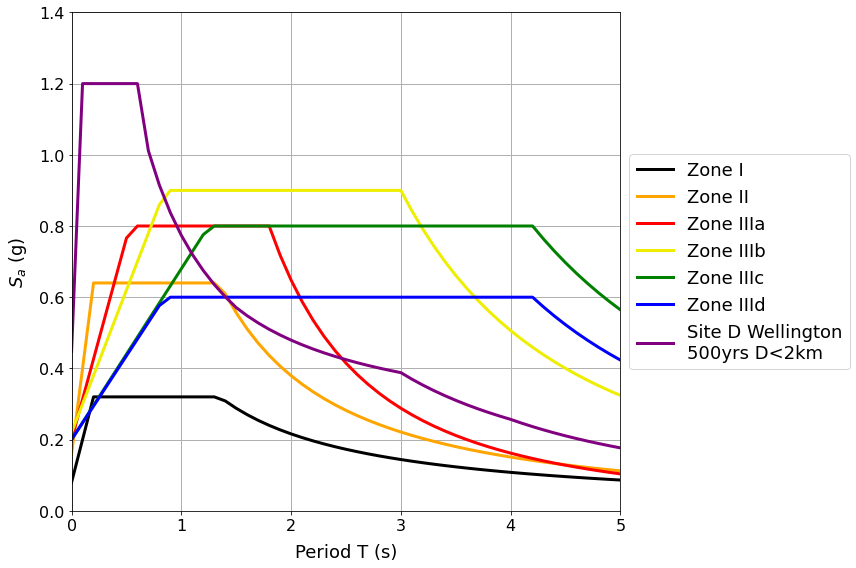

In [25]:
#fig, ax = plt.subplots()
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)

# Plot Design Response Spectrum for Zone I
ax.plot(df_design_RS['T(s)'], df_design_RS['Zone I (elastic)'], linewidth=3, c='black', label='Zone I')

# Plot Design Response Spectrum for Zone II
ax.plot(df_design_RS['T(s)'], df_design_RS['Zone II (elastic)'], linewidth=3, c='orange', label='Zone II')

# Plot Design Response Spectrum for Zone III a
ax.plot(df_design_RS['T(s)'], df_design_RS['Zone IIIa (elastic)'], linewidth=3, c='red', label='Zone IIIa')

# Plot Design Response Spectrum for Zone III b
ax.plot(df_design_RS['T(s)'], df_design_RS['Zone IIIb (elastic)'], linewidth=3, c=(0.933, 0.933, 0, 1), label='Zone IIIb')

# Plot Design Response Spectrum for Zone III c
ax.plot(df_design_RS['T(s)'], df_design_RS['Zone IIIc (elastic)'], linewidth=3, c='green', label='Zone IIIc')

# Plot Design Response Spectrum for Zone III d
ax.plot(df_design_RS['T(s)'], df_design_RS['Zone IIId (elastic)'], linewidth=3, c='blue', label='Zone IIId')

# Plot NZS 1170.5 Design Spectrum
ax.plot(df_design_RS['T(s)'], df_design_RS['NZS 1170.5 Spectrum'], linewidth=3, c='purple', label='Site D Wellington\n500yrs D<2km')

# Add line for period and spectral acceleration
x_x=[1.512,1.512]
y_y=[0.0,0.24]

x_x2=[0,1.512]
y_y2=[0.240,0.240]

#ax.plot(x_x, y_y, lw=4, c='green')
#ax.plot(x_x2, y_y2, lw=4, c='green')

# Set axes limits
ax.set_xlim(0,5)
ax.set_ylim(0,1.4)

# Tick parameters
ax.tick_params(axis="x", labelsize=16)
ax.tick_params(axis="y", labelsize=16)

# Axes titles
ax.set_xlabel('Period T (s)', fontsize = 18, labelpad=10)
ax.set_ylabel('$S_a$ (g)', fontsize = 18, labelpad=10)

# Grid lines
ax.grid(linewidth=1)

# Legend
box = ax.get_position()
#ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 18})

plt.tight_layout()

# Export figure
fig.savefig("/homevol/sroe459/git_projects/2017-Puebla-Mexico-earthquake/Figures/Design_RS_2004_code.png", dpi=200)

# Stations SCT and CU

In [26]:
df_STC.columns

Index(['T(s)', 'SCT-NorthSouth-19Sep1985-Damping5percent-Sa(g)',
       'SCT-EastWest-19Sep1985-Damping5percent-Sa(g)',
       'SCT-EastWest-19Sep2017-Damping5percent-Sa(g)'],
      dtype='object')

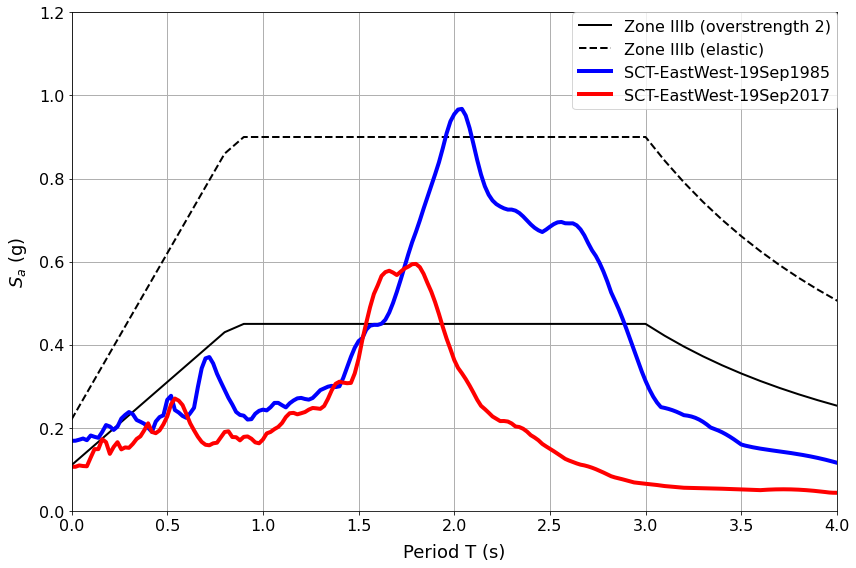

In [35]:
#fig, ax = plt.subplots()
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)

# Plot Design Response Spectrum
ax.plot(df_design_RS['T(s)'], df_design_RS['Zone IIIb (overstrength 2)'], linewidth=2, c='black', label='Zone IIIb (overstrength 2)')

# Plot Design Response Spectrum
ax.plot(df_design_RS['T(s)'], df_design_RS['Zone IIIb (elastic)'], linewidth=2, c='black', linestyle='--', label='Zone IIIb (elastic)')

# Plot SCT 1985
#ax.plot(df_STC['T(s)'], df_STC['SCT-NorthSouth-19Sep1985-Damping5percent-Sa(g)'], linewidth=4, c='lightblue', label='SCT-NorthSouth-19Sep1985')

# Plot SCT 1985
ax.plot(df_SCT['T(s)'], df_SCT['SCT-EastWest-19Sep1985-Damping5percent-Sa(g)'], linewidth=4, c='blue', label='SCT-EastWest-19Sep1985')

# Plot SCT 2017
ax.plot(df_SCT['T(s)'], df_SCT['SCT-EastWest-19Sep2017-Damping5percent-Sa(g)'], linewidth=4, c='red', label='SCT-EastWest-19Sep2017')

# Add line for period and spectral accelaration
x_x=[1.512,1.512]
y_y=[0.0,0.24]

x_x2=[0,1.512]
y_y2=[0.240,0.240]

#ax.plot(x_x, y_y, lw=4, c='green')
#ax.plot(x_x2, y_y2, lw=4, c='green')

# Set axes limits
ax.set_xlim(0,4)
ax.set_ylim(0,1.2)

# Tick parameters
ax.tick_params(axis="x", labelsize=16)
ax.tick_params(axis="y", labelsize=16)

# Axes titles
ax.set_xlabel('Period T (s)', fontsize = 18, labelpad=10)
ax.set_ylabel('$S_a$ (g)', fontsize = 18, labelpad=10)

# Grid lines
ax.grid(linewidth=1)

# Legend
ax.legend(loc=1, borderaxespad=0., prop={'size': 16})

plt.tight_layout()

# Export figure
fig.savefig("/homevol/sroe459/git_projects/2017-Puebla-Mexico-earthquake/Figures/spectrum_station_SCT.png", dpi=200)

In [29]:
df_CU.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   T(s)                     201 non-null    float64
 1   CU 19 Sep 1985 5% Sa(g)  201 non-null    float64
 2   T(s).1                   201 non-null    float64
 3   CU 19 Sep 2017 5% Sa(g)  201 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


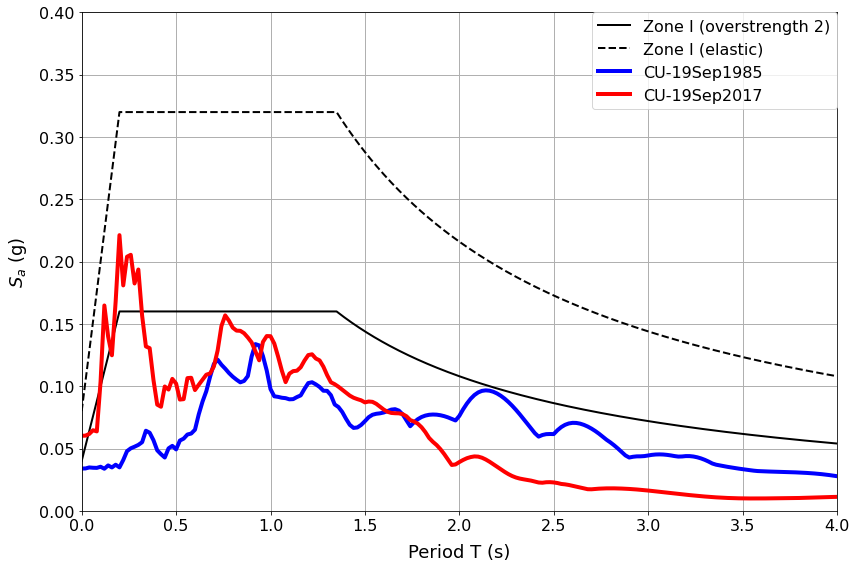

In [15]:
#fig, ax = plt.subplots()
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)

# Plot Design Response Spectrum
ax.plot(df_design_RS['T(s)'], df_design_RS['Zone I (overstrength 2)'], linewidth=2, c='black', label='Zone I (overstrength 2)')

# Plot Design Response Spectrum
ax.plot(df_design_RS['T(s)'], df_design_RS['Zone I (elastic)'], linewidth=2, c='black', linestyle='--', label='Zone I (elastic)')

# Plot CU 1985
ax.plot(df_CU['T(s)'], df_CU['CU 19 Sep 1985 5% Sa(g)'], linewidth=4, c='blue', label='CU-19Sep1985')

# Plot CU 2017
ax.plot(df_CU['T(s)'], df_CU['CU 19 Sep 2017 5% Sa(g)'], linewidth=4, c='red', label='CU-19Sep2017')

# Add line for period and spectral accelaration
x_x=[1.512,1.512]
y_y=[0.0,0.24]

x_x2=[0,1.512]
y_y2=[0.240,0.240]

#ax.plot(x_x, y_y, lw=4, c='green')
#ax.plot(x_x2, y_y2, lw=4, c='green')

# Set axes limits
ax.set_xlim(0,4)
ax.set_ylim(0,0.4)

# Tick parameters
ax.tick_params(axis="x", labelsize=16)
ax.tick_params(axis="y", labelsize=16)

# Axes titles
ax.set_xlabel('Period T (s)', fontsize = 18, labelpad=10)
ax.set_ylabel('$S_a$ (g)', fontsize = 18, labelpad=10)

# Grid lines
ax.grid(linewidth=1)

# Legend
ax.legend(loc=0, borderaxespad=0., prop={'size': 16})

plt.tight_layout()

# Export figure
fig.savefig("/homevol/sroe459/git_projects/2017-Puebla-Mexico-earthquake/Figures/spectrum_station_CU.png", dpi=200)

# CIRES stations

Accelerograph Network for Mexico City

[RED ACELEROGRÁFICA DE LA CIUDAD DE MÉXICO (RACM)](http://www.cires.mx/racm_in.php)

Interactive map available at:
http://www.cires.org.mx/racm_mapa/index.php

In [16]:
with pd.option_context('display.max_rows', 100):
    display(df_CIRES_station_location)

CIRES_Station_Name CIRES_Station_ID  Latitude  Longitude       Zone  \
0                CE18             EQ11   19.3398   -99.0847     Zone I   
1                CS78             EQ21   19.3656   -99.2262     Zone I   
2                FJ74             EQ28   19.2990   -99.2100     Zone I   
3                MT50             EQ41   19.4253   -99.1900     Zone I   
4                PA34             EQ45   19.2016   -99.0491     Zone I   
5                TP13             EQ55   19.2922   -99.1708     Zone I   
6                UI21             EQ57   19.3700   -99.2642     Zone I   
7                AU46              EQ6   19.3832   -99.1681    Zone II   
8                CO47             EQ18   19.3714   -99.1703    Zone II   
9                DR16             EQ24   19.5005   -99.1829    Zone II   
10               DX37             EQ25   19.3322   -99.1439    Zone II   
11               EO30             EQ26   19.3885   -99.1772    Zone II   
12               GR27             EQ31   19.4747   -99.1797    Zone II   
13               ME52             EQ39   19.4383   -99.1820    Zone II   
14               AO24              EQ3   19.3580   -99.1539  Zone IIIa   
15               CH84             EQ14   19.3300   -99.1254  Zone IIIa   
16               ES57             EQ27   19.4017   -99.1775  Zone IIIa   
17               IB22             EQ33   19.3450   -99.1297  Zone IIIa   
18               JC54             EQ35   19.3130   -99.1272  Zone IIIa   
19               LI33             EQ36   19.3064   -98.9631  Zone IIIa   
20               LV17             EQ38   19.4931   -99.1275  Zone IIIa   
21               MI15             EQ40   19.2834   -99.1253  Zone IIIa   
22               SI53             EQ50   19.3753   -99.1483  Zone IIIa   
23               UC44             EQ56   19.4337   -99.1654  Zone IIIa   
24               AL01              EQ2   19.4356   -99.1453  Zone IIIb   
25               BL45              EQ8   19.4253   -99.1481  Zone IIIb   
26               CI05             EQ15   19.4186   -99.1653  Zone IIIb   
27               CJ03             EQ16   19.4097   -99.1567  Zone IIIb   
28               CJ04             EQ17   19.4098   -99.1566  Zone IIIb   
29               CO56             EQ19   19.4215   -99.1590  Zone IIIb   
30               GA62             EQ29   19.4385   -99.1401  Zone IIIb   
31               GC38             EQ30   19.3161   -99.1059  Zone IIIb   
32               LI58             EQ37   19.4263   -99.1569  Zone IIIb   
33               PE10             EQ47   19.3809   -99.1318  Zone IIIb   
34               RM48             EQ49   19.4359   -99.1280  Zone IIIb   
35               SP51             EQ51   19.3656   -99.1189  Zone IIIb   
36               TL08             EQ53   19.4500   -99.1336  Zone IIIb   
37               TL55             EQ54   19.4536   -99.1425  Zone IIIb   
38               VG09             EQ58   19.4539   -99.1225  Zone IIIb   
39               AP68              EQ4   19.3809   -99.1068  Zone IIIc   
40               BA49              EQ7   19.4097   -99.1450  Zone IIIc   
41               BO39              EQ9   19.4653   -99.1047  Zone IIIc   
42               CA59             EQ10   19.4258   -99.1183  Zone IIIc   
43               CU80             EQ22   19.2938   -99.1037  Zone IIIc   
44               HJ72             EQ32   19.4251   -99.1301  Zone IIIc   
45               JA43             EQ34   19.4053   -99.1250  Zone IIIc   
46               MY19             EQ42   19.3461   -99.0433  Zone IIIc   
47               RI76             EQ48   19.4473   -99.1000  Zone IIIc   
48               VM29             EQ59   19.3811   -99.1253  Zone IIIc   
49               XP06             EQ61   19.4198   -99.1353  Zone IIIc   
50               AE02              EQ1   19.4290   -99.0584  Zone IIId   
51               AU11              EQ5   19.3919   -99.0869  Zone IIId   
52               CE23             EQ12   19.4619   -99.0642  Zone IIId   
53     

![Map_CIRES_Stations](Red_Acelerografica_de_la_Ciudad_de_Mexico_RACM.png)

# Plot Response Spectrum

## For each geotechnical zone

### Zone I (firm soil)

In [17]:
df_CIRES_ZoneI.columns

Index(['Time(s)', 'CE18-EQ11-psaNorthSouth(g)', 'CE18-EQ11-psaEastWest(g)',
       'CS78-EQ21-psaNorthSouth(g)', 'CS78-EQ21-psaEastWest(g)',
       'FJ74-EQ28-psaNorthSouth(g)', 'FJ74-EQ28-psaEastWest(g)',
       'MT50-EQ41-psaNorthSouth(g)', 'MT50-EQ41-psaEastWest(g)',
       'PA34-EQ45-psaNorthSouth(g)', 'PA34-EQ45-psaEastWest(g)',
       'TP13-EQ55-psaNorthSouth(g)', 'TP13-EQ55-psaEastWest(g)',
       'UI21-EQ57-psaNorthSouth(g)', 'UI21-EQ57-psaEastWest(g)',
       'Median-ZoneI-psaNorthSouth(g)', 'StandardDev-ZoneI-psaNorthSouth(g)',
       'Median-ZoneI-psaEastWest(g)', 'StandardDev-ZoneI-psaEastWest(g)'],
      dtype='object')

In [18]:
df_CIRES_ZoneI_NorthSouth = df_CIRES_ZoneI[['CE18-EQ11-psaNorthSouth(g)',
                                            'CS78-EQ21-psaNorthSouth(g)', 
                                            'FJ74-EQ28-psaNorthSouth(g)', 
                                            'MT50-EQ41-psaNorthSouth(g)', 
                                            'PA34-EQ45-psaNorthSouth(g)', 
                                            'TP13-EQ55-psaNorthSouth(g)',
                                            'UI21-EQ57-psaNorthSouth(g)']]

In [19]:
df_CIRES_ZoneI_EastWest = df_CIRES_ZoneI[['CE18-EQ11-psaEastWest(g)',
                                          'CS78-EQ21-psaEastWest(g)',
                                          'FJ74-EQ28-psaEastWest(g)',
                                          'MT50-EQ41-psaEastWest(g)',
                                          'PA34-EQ45-psaEastWest(g)',
                                          'TP13-EQ55-psaEastWest(g)',
                                          'UI21-EQ57-psaEastWest(g)']]

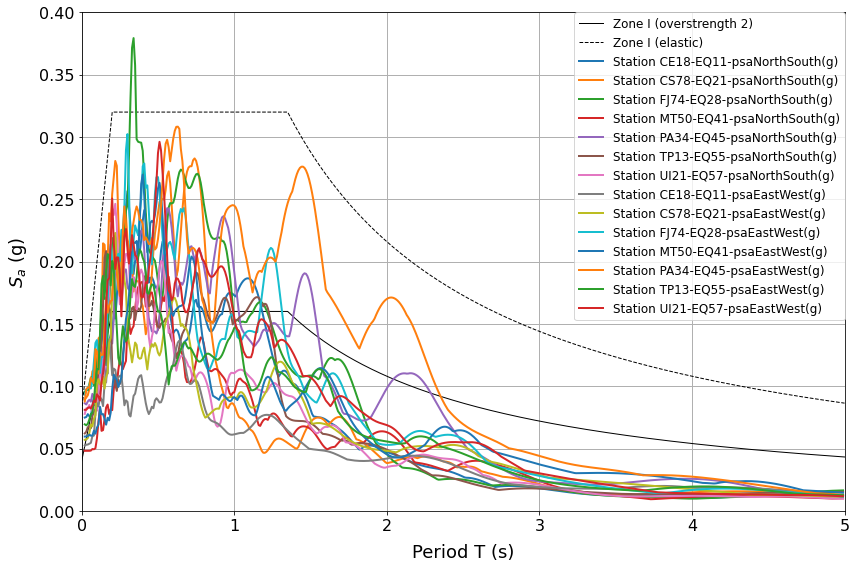

In [20]:
#fig, ax = plt.subplots()
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)

# Plot Design Response Spectrum
ax.plot(df_design_RS['T(s)'], df_design_RS['Zone I (overstrength 2)'], linewidth=1, c='black', label='Zone I (overstrength 2)')

# Plot Design Response Spectrum
ax.plot(df_design_RS['T(s)'], df_design_RS['Zone I (elastic)'], linewidth=1, c='black', linestyle='--', label='Zone I (elastic)')

# Plot North-South component
for i in df_CIRES_ZoneI_NorthSouth:
    ax.plot(df_CIRES_ZoneI['Time(s)'], df_CIRES_ZoneI[i], linewidth=2, label='Station %s' %i)

# Plot East-West component
for i in df_CIRES_ZoneI_EastWest: 
    ax.plot(df_CIRES_ZoneI['Time(s)'], df_CIRES_ZoneI[i], linewidth=2, label='Station %s' %i)

# Add line for period and spectral acceleration
x_x=[1.512,1.512]
y_y=[0.0,0.24]

x_x2=[0,1.512]
y_y2=[0.240,0.240]

#ax.plot(x_x, y_y, lw=4, c='green')
#ax.plot(x_x2, y_y2, lw=4, c='green')

# Set axes limits
ax.set_xlim(0,5)
ax.set_ylim(0,0.4)

# Tick parameters
ax.tick_params(axis="x", labelsize=16)
ax.tick_params(axis="y", labelsize=16)

# Axes titles
ax.set_xlabel('Period T (s)', fontsize = 18, labelpad=10)
ax.set_ylabel('$S_a$ (g)', fontsize = 18, labelpad=10)

# Grid lines
ax.grid(linewidth=1)

# Legend
# Shrink current axis by 20%
box = ax.get_position()
#ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc=0, borderaxespad=0., prop={'size': 12}) #bbox_to_anchor=(1.05, 1),

plt.tight_layout()

# Export figure
fig.savefig("/homevol/sroe459/git_projects/2017-Puebla-Mexico-earthquake/Figures/spectrum_ZoneI.png", dpi=200)

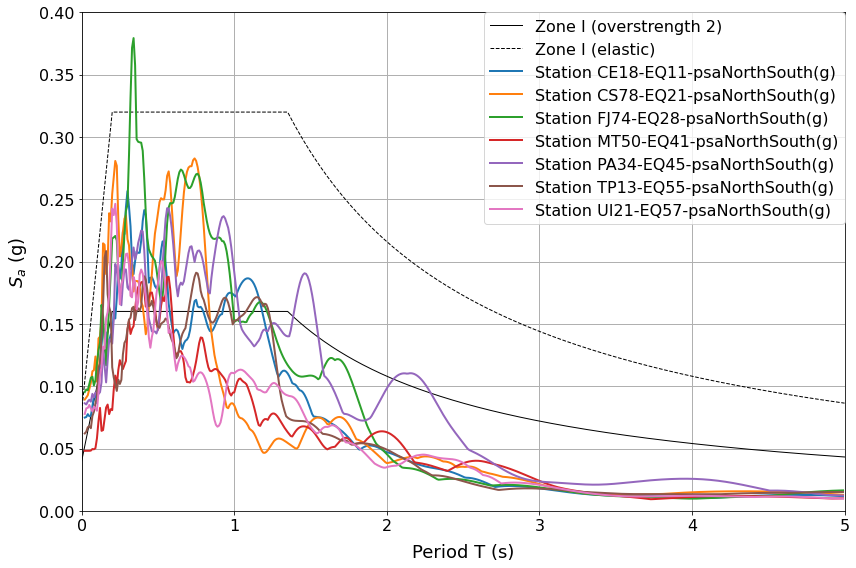

In [21]:
#fig, ax = plt.subplots()
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)

# Plot Design Response Spectrum
ax.plot(df_design_RS['T(s)'], df_design_RS['Zone I (overstrength 2)'], linewidth=1, c='black', label='Zone I (overstrength 2)')

# Plot Design Response Spectrum
ax.plot(df_design_RS['T(s)'], df_design_RS['Zone I (elastic)'], linewidth=1, c='black', linestyle='--', label='Zone I (elastic)')

# Plot North-South component
for i in df_CIRES_ZoneI_NorthSouth:
    ax.plot(df_CIRES_ZoneI['Time(s)'], df_CIRES_ZoneI[i], linewidth=2, label='Station %s' %i)

# Plot East-West component
#for i in df_CIRES_ZoneI_EastWest: 
#    ax.plot(df_CIRES_ZoneI['Time(s)'], df_CIRES_ZoneI[i], linewidth=4, label='Station %s' %i)

# Add line for period and spectral accelaration
x_x=[1.512,1.512]
y_y=[0.0,0.24]

x_x2=[0,1.512]
y_y2=[0.240,0.240]

#ax.plot(x_x, y_y, lw=4, c='green')
#ax.plot(x_x2, y_y2, lw=4, c='green')

# Set axes limits
ax.set_xlim(0,5)
ax.set_ylim(0,0.4)

# Tick parameters
ax.tick_params(axis="x", labelsize=16)
ax.tick_params(axis="y", labelsize=16)

# Axes titles
ax.set_xlabel('Period T (s)', fontsize = 18, labelpad=10)
ax.set_ylabel('$S_a$ (g)', fontsize = 18, labelpad=10)

# Grid lines
ax.grid(linewidth=1)

# Legend
ax.legend(loc=0, borderaxespad=0., prop={'size': 16})

plt.tight_layout()

# Export figure
fig.savefig("/homevol/sroe459/git_projects/2017-Puebla-Mexico-earthquake/Figures/spectrum_ZoneI-NorthSouth.png", dpi=200)

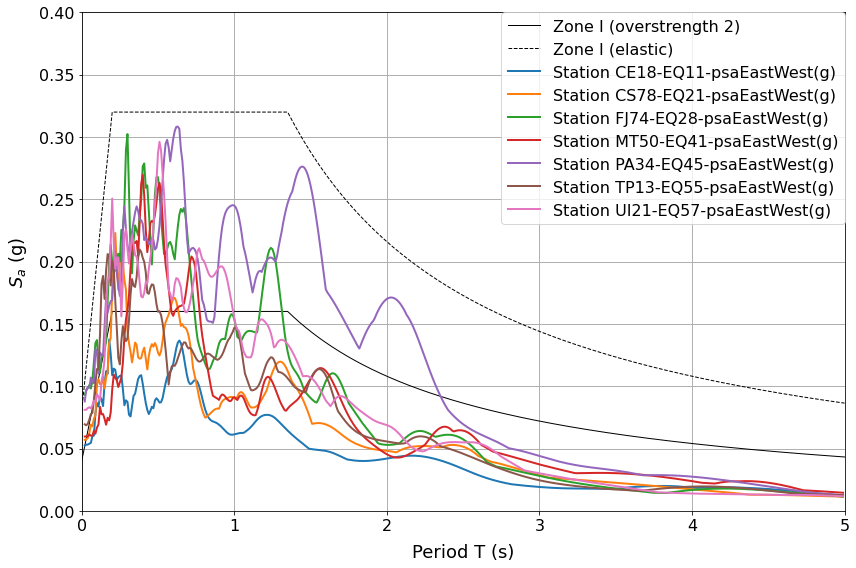

In [22]:
#fig, ax = plt.subplots()
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)

# Plot Design Response Spectrum
ax.plot(df_design_RS['T(s)'], df_design_RS['Zone I (overstrength 2)'], linewidth=1, c='black', label='Zone I (overstrength 2)')

# Plot Design Response Spectrum
ax.plot(df_design_RS['T(s)'], df_design_RS['Zone I (elastic)'], linewidth=1, c='black', linestyle='--', label='Zone I (elastic)')

# Plot North-South component
#for i in df_CIRES_ZoneI_NorthSouth:
#    ax.plot(df_CIRES_ZoneI['Time(s)'], df_CIRES_ZoneI[i], linewidth=2, label='Station %s' %i)

# Plot East-West component
for i in df_CIRES_ZoneI_EastWest: 
   ax.plot(df_CIRES_ZoneI['Time(s)'], df_CIRES_ZoneI[i], linewidth=2, label='Station %s' %i)

# Add line for period and spectral accelaration
x_x=[1.512,1.512]
y_y=[0.0,0.24]

x_x2=[0,1.512]
y_y2=[0.240,0.240]

#ax.plot(x_x, y_y, lw=4, c='green')
#ax.plot(x_x2, y_y2, lw=4, c='green')

# Set axes limits
ax.set_xlim(0,5)
ax.set_ylim(0,0.4)

# Tick parameters
ax.tick_params(axis="x", labelsize=16)
ax.tick_params(axis="y", labelsize=16)

# Axes titles
ax.set_xlabel('Period T (s)', fontsize = 18, labelpad=10)
ax.set_ylabel('$S_a$ (g)', fontsize = 18, labelpad=10)

# Grid lines
ax.grid(linewidth=1)

# Legend
ax.legend(loc=0, borderaxespad=0., prop={'size': 16})

plt.tight_layout()

# Export figure
fig.savefig("/homevol/sroe459/git_projects/2017-Puebla-Mexico-earthquake/Figures/spectrum_ZoneI-EastWest.png", dpi=200)

### Zone II (transition)

In [23]:
df_CIRES_ZoneII.columns

Index(['Time(s)', 'AU46-EQ6-psaNorthSouth(g)', 'AU46-EQ6-psaEastWest(g)',
       'CO47-EQ18-psaNorthSouth(g)', 'CO47-EQ18-psaEastWest(g)',
       'DR16-EQ24-psaNorthSouth(g)', 'DR16-EQ24-psaEastWest(g)',
       'DX37-EQ25-psaNorthSouth(g)', 'DX37-EQ25-psaEastWest(g)',
       'EO30-EQ26-psaNorthSouth(g)', 'EO30-EQ26-psaEastWest(g)',
       'GR27-EQ31-psaNorthSouth(g)', 'GR27-EQ31-psaEastWest(g)',
       'ME52-EQ39-psaNorthSouth(g)', 'ME52-EQ39-psaEastWest(g)',
       'Median-ZoneII-psaNorthSouth(g)', 'StandardDev-ZoneII-psaNorthSouth(g)',
       'Median-ZoneII-psaEastWest(g)', 'StandardDev-ZoneII-psaEastWest(g)'],
      dtype='object')

In [24]:
df_CIRES_ZoneII_NorthSouth = df_CIRES_ZoneII[['AU46-EQ6-psaNorthSouth(g)',
                                               'CO47-EQ18-psaNorthSouth(g)',
                                               'DR16-EQ24-psaNorthSouth(g)', 
                                               'DX37-EQ25-psaNorthSouth(g)',
                                               'EO30-EQ26-psaNorthSouth(g)',
                                               'GR27-EQ31-psaNorthSouth(g)',
                                               'ME52-EQ39-psaNorthSouth(g)']]

In [25]:
df_CIRES_ZoneII_EastWest = df_CIRES_ZoneII[['AU46-EQ6-psaEastWest(g)',
                                              'CO47-EQ18-psaEastWest(g)',
                                              'DR16-EQ24-psaEastWest(g)',
                                              'DX37-EQ25-psaEastWest(g)',
                                              'EO30-EQ26-psaEastWest(g)',
                                              'GR27-EQ31-psaEastWest(g)',
                                              'ME52-EQ39-psaEastWest(g)']]

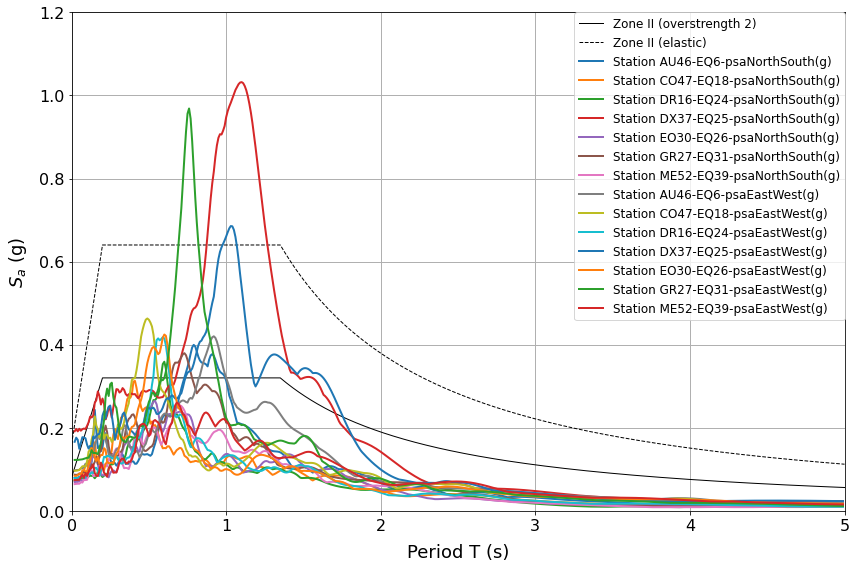

In [26]:
#fig, ax = plt.subplots()
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)

# Plot Design Response Spectrum
ax.plot(df_design_RS['T(s)'], df_design_RS['Zone II (overstrength 2)'], linewidth=1, c='black', label='Zone II (overstrength 2)')

# Plot Design Response Spectrum
ax.plot(df_design_RS['T(s)'], df_design_RS['Zone II (elastic)'], linewidth=1, c='black', linestyle='--', label='Zone II (elastic)')

# Plot North-South component
for i in df_CIRES_ZoneII_NorthSouth:
    ax.plot(df_CIRES_ZoneII['Time(s)'], df_CIRES_ZoneII[i], linewidth=2, label='Station %s' %i)

# Plot East-West component
for i in df_CIRES_ZoneII_EastWest: 
    ax.plot(df_CIRES_ZoneII['Time(s)'], df_CIRES_ZoneII[i], linewidth=2, label='Station %s' %i)

# Add line for period and spectral acceleration
x_x=[1.512,1.512]
y_y=[0.0,0.24]

x_x2=[0,1.512]
y_y2=[0.240,0.240]

#ax.plot(x_x, y_y, lw=4, c='green')
#ax.plot(x_x2, y_y2, lw=4, c='green')

# Set axes limits
ax.set_xlim(0,5)
ax.set_ylim(0,1.2)

# Tick parameters
ax.tick_params(axis="x", labelsize=16)
ax.tick_params(axis="y", labelsize=16)

# Axes titles
ax.set_xlabel('Period T (s)', fontsize = 18, labelpad=10)
ax.set_ylabel('$S_a$ (g)', fontsize = 18, labelpad=10)

# Grid lines
ax.grid(linewidth=1)

# Legend
# Shrink current axis by 20%
box = ax.get_position()
#ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc=0, borderaxespad=0., prop={'size': 12}) #bbox_to_anchor=(1.05, 1),

plt.tight_layout()

# Export figure
fig.savefig("/homevol/sroe459/git_projects/2017-Puebla-Mexico-earthquake/Figures/spectrum_ZoneII.png", dpi=200)

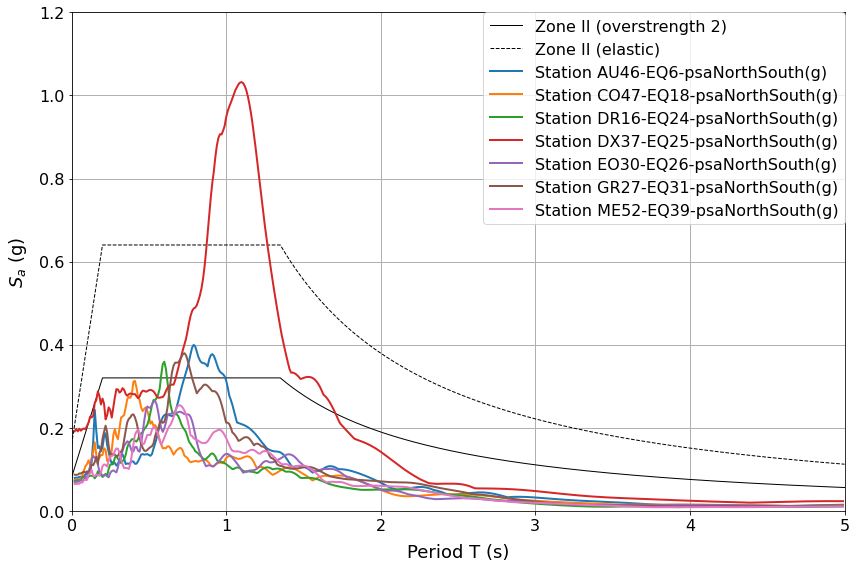

In [27]:
#fig, ax = plt.subplots()
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)

# Plot Design Response Spectrum
ax.plot(df_design_RS['T(s)'], df_design_RS['Zone II (overstrength 2)'], linewidth=1, c='black', label='Zone II (overstrength 2)')

# Plot Design Response Spectrum
ax.plot(df_design_RS['T(s)'], df_design_RS['Zone II (elastic)'], linewidth=1, c='black', linestyle='--', label='Zone II (elastic)')

# Plot North-South component
for i in df_CIRES_ZoneII_NorthSouth:
    ax.plot(df_CIRES_ZoneII['Time(s)'], df_CIRES_ZoneII[i], linewidth=2, label='Station %s' %i)

# Plot East-West component
#for i in df_CIRES_ZoneII_EastWest: 
#    ax.plot(df_CIRES_ZoneII['Time(s)'], df_CIRES_ZoneII[i], linewidth=2, label='Station %s' %i)

# Add line for period and spectral accelaration
x_x=[1.512,1.512]
y_y=[0.0,0.24]

x_x2=[0,1.512]
y_y2=[0.240,0.240]

#ax.plot(x_x, y_y, lw=4, c='green')
#ax.plot(x_x2, y_y2, lw=4, c='green')

# Set axes limits
ax.set_xlim(0,5)
ax.set_ylim(0,1.2)

# Tick parameters
ax.tick_params(axis="x", labelsize=16)
ax.tick_params(axis="y", labelsize=16)

# Axes titles
ax.set_xlabel('Period T (s)', fontsize = 18, labelpad=10)
ax.set_ylabel('$S_a$ (g)', fontsize = 18, labelpad=10)

# Grid lines
ax.grid(linewidth=1)

# Legend
ax.legend(loc=0, borderaxespad=0., prop={'size': 16})

plt.tight_layout()

# Export figure
fig.savefig("/homevol/sroe459/git_projects/2017-Puebla-Mexico-earthquake/Figures/spectrum_ZoneII-NorthSouth.png", dpi=200)

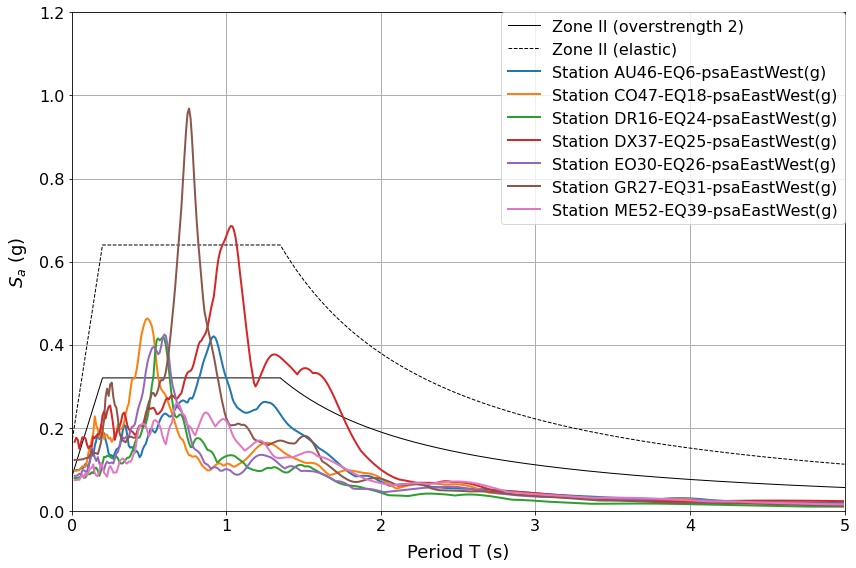

In [28]:
#fig, ax = plt.subplots()
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)

# Plot Design Response Spectrum
ax.plot(df_design_RS['T(s)'], df_design_RS['Zone II (overstrength 2)'], linewidth=1, c='black', label='Zone II (overstrength 2)')

# Plot Design Response Spectrum
ax.plot(df_design_RS['T(s)'], df_design_RS['Zone II (elastic)'], linewidth=1, c='black', linestyle='--', label='Zone II (elastic)')

# Plot North-South component
#for i in df_CIRES_ZoneII_NorthSouth:
#    ax.plot(df_CIRES_ZoneII['Time(s)'], df_CIRES_ZoneII[i], linewidth=2, label='Station %s' %i)

# Plot East-West component
for i in df_CIRES_ZoneII_EastWest: 
    ax.plot(df_CIRES_ZoneII['Time(s)'], df_CIRES_ZoneII[i], linewidth=2, label='Station %s' %i)

# Add line for period and spectral accelaration
x_x=[1.512,1.512]
y_y=[0.0,0.24]

x_x2=[0,1.512]
y_y2=[0.240,0.240]

#ax.plot(x_x, y_y, lw=4, c='green')
#ax.plot(x_x2, y_y2, lw=4, c='green')

# Set axes limits
ax.set_xlim(0,5)
ax.set_ylim(0,1.2)

# Tick parameters
ax.tick_params(axis="x", labelsize=16)
ax.tick_params(axis="y", labelsize=16)

# Axes titles
ax.set_xlabel('Period T (s)', fontsize = 18, labelpad=10)
ax.set_ylabel('$S_a$ (g)', fontsize = 18, labelpad=10)

# Grid lines
ax.grid(linewidth=1)

# Legend
ax.legend(loc=0, borderaxespad=0., prop={'size': 16})

plt.tight_layout()

# Export figure
fig.savefig("/homevol/sroe459/git_projects/2017-Puebla-Mexico-earthquake/Figures/spectrum_ZoneII-EastWest.png", dpi=200)

### Zone IIIa (soft soil)

In [29]:
df_CIRES_ZoneIIIa.columns

Index(['Time(s)', 'AO24-EQ3-psaNorthSouth(g)', 'AO24-EQ3-psaEastWest(g)',
       'CH84-EQ14-psaNorthSouth(g)', 'CH84-EQ14-psaEastWest(g)',
       'ES57-EQ27-psaNorthSouth(g)', 'ES57-EQ27-psaEastWest(g)',
       'IB22-EQ33-psaNorthSouth(g)', 'IB22-EQ33-psaEastWest(g)',
       'JC54-EQ35-psaNorthSouth(g)', 'JC54-EQ35-psaEastWest(g)',
       'LI33-EQ36-psaNorthSouth(g)', 'LI33-EQ36-psaEastWest(g)',
       'LV17-EQ38-psaNorthSouth(g)', 'LV17-EQ38-psaEastWest(g)',
       'MI15-EQ40-psaNorthSouth(g)', 'MI15-EQ40-psaEastWest(g)',
       'SI53-EQ50-psaNorthSouth(g)', 'SI53-EQ50-psaEastWest(g)',
       'UC44-EQ56-psaNorthSouth(g)', 'UC44-EQ56-psaEastWest(g)',
       'Median-ZoneIIIa-psaNorthSouth(g)',
       'StandardDev-ZoneIIIa-psaNorthSouth(g)',
       'Median-ZoneIIIa-psaEastWest(g)',
       'StandardDev-ZoneIIIa-psaEastWest(g)'],
      dtype='object')

In [30]:
df_CIRES_ZoneIIIa_NorthSouth = df_CIRES_ZoneIIIa[['AO24-EQ3-psaNorthSouth(g)',
                                                  'CH84-EQ14-psaNorthSouth(g)',
                                                  'ES57-EQ27-psaNorthSouth(g)',
                                                  'IB22-EQ33-psaNorthSouth(g)',
                                                  'JC54-EQ35-psaNorthSouth(g)',
                                                  'LI33-EQ36-psaNorthSouth(g)',
                                                  'LV17-EQ38-psaNorthSouth(g)',
                                                  'MI15-EQ40-psaNorthSouth(g)',
                                                  'SI53-EQ50-psaNorthSouth(g)',
                                                  'UC44-EQ56-psaNorthSouth(g)']]

In [31]:
df_CIRES_ZoneIIIa_EastWest = df_CIRES_ZoneIIIa[['AO24-EQ3-psaEastWest(g)',
                                                'CH84-EQ14-psaEastWest(g)',
                                                'ES57-EQ27-psaEastWest(g)',
                                                'IB22-EQ33-psaEastWest(g)',
                                                'JC54-EQ35-psaEastWest(g)',
                                                'LI33-EQ36-psaEastWest(g)',
                                                'LV17-EQ38-psaEastWest(g)',
                                                'MI15-EQ40-psaEastWest(g)',
                                                'SI53-EQ50-psaEastWest(g)',
                                                'UC44-EQ56-psaEastWest(g)']]

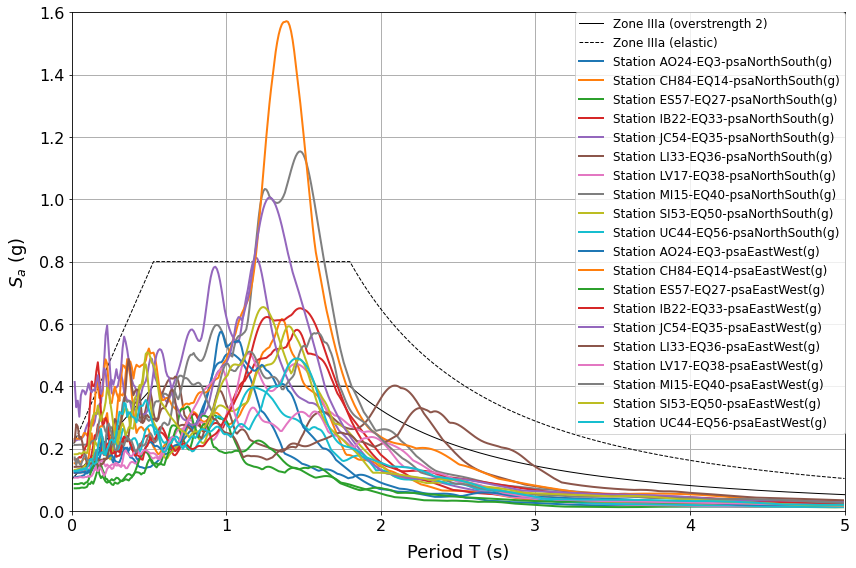

In [32]:
#fig, ax = plt.subplots()
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)

# Plot Design Response Spectrum
ax.plot(df_design_RS['T(s)'], df_design_RS['Zone IIIa (overstrength 2)'], linewidth=1, c='black', label='Zone IIIa (overstrength 2)')

# Plot Design Response Spectrum
ax.plot(df_design_RS['T(s)'], df_design_RS['Zone IIIa (elastic)'], linewidth=1, c='black', linestyle='--', label='Zone IIIa (elastic)')

# Plot North-South component
for i in df_CIRES_ZoneIIIa_NorthSouth:
    ax.plot(df_CIRES_ZoneIIIa['Time(s)'], df_CIRES_ZoneIIIa[i], linewidth=2, label='Station %s' %i)

# Plot East-West component
for i in df_CIRES_ZoneIIIa_EastWest: 
    ax.plot(df_CIRES_ZoneIIIa['Time(s)'], df_CIRES_ZoneIIIa[i], linewidth=2, label='Station %s' %i)

# Add line for period and spectral acceleration
x_x=[1.512,1.512]
y_y=[0.0,0.24]

x_x2=[0,1.512]
y_y2=[0.240,0.240]

#ax.plot(x_x, y_y, lw=4, c='green')
#ax.plot(x_x2, y_y2, lw=4, c='green')

# Set axes limits
ax.set_xlim(0,5)
ax.set_ylim(0,1.6)

# Tick parameters
ax.tick_params(axis="x", labelsize=16)
ax.tick_params(axis="y", labelsize=16)

# Axes titles
ax.set_xlabel('Period T (s)', fontsize = 18, labelpad=10)
ax.set_ylabel('$S_a$ (g)', fontsize = 18, labelpad=10)

# Grid lines
ax.grid(linewidth=1)

# Legend
# Shrink current axis by 20%
box = ax.get_position()
#ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc=0, borderaxespad=0., prop={'size': 12}) #bbox_to_anchor=(1.05, 1),

plt.tight_layout()

# Export figure
fig.savefig("/homevol/sroe459/git_projects/2017-Puebla-Mexico-earthquake/Figures/spectrum_ZoneIIIa.png", dpi=200)

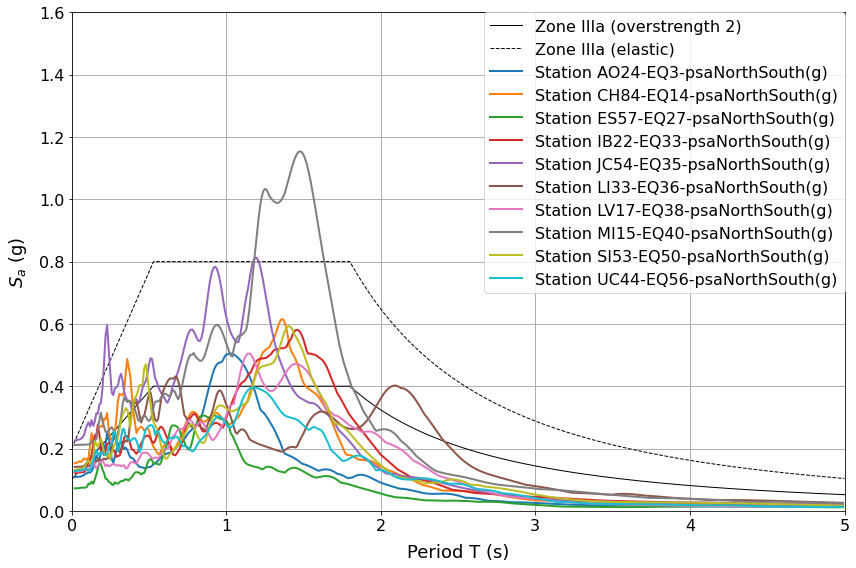

In [33]:
#fig, ax = plt.subplots()
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)

# Plot Design Response Spectrum
ax.plot(df_design_RS['T(s)'], df_design_RS['Zone IIIa (overstrength 2)'], linewidth=1, c='black', label='Zone IIIa (overstrength 2)')

# Plot Design Response Spectrum
ax.plot(df_design_RS['T(s)'], df_design_RS['Zone IIIa (elastic)'], linewidth=1, c='black', linestyle='--', label='Zone IIIa (elastic)')

# Plot North-South component
for i in df_CIRES_ZoneIIIa_NorthSouth:
    ax.plot(df_CIRES_ZoneIIIa['Time(s)'], df_CIRES_ZoneIIIa[i], linewidth=2, label='Station %s' %i)

# Plot East-West component
#for i in df_CIRES_ZoneIIIa_EastWest: 
#    ax.plot(df_CIRES_ZoneIIIa['Time(s)'], df_CIRES_ZoneIIIa[i], linewidth=2, label='Station %s' %i)

# Add line for period and spectral accelaration
x_x=[1.512,1.512]
y_y=[0.0,0.24]

x_x2=[0,1.512]
y_y2=[0.240,0.240]

#ax.plot(x_x, y_y, lw=4, c='green')
#ax.plot(x_x2, y_y2, lw=4, c='green')

# Set axes limits
ax.set_xlim(0,5)
ax.set_ylim(0,1.6)

# Tick parameters
ax.tick_params(axis="x", labelsize=16)
ax.tick_params(axis="y", labelsize=16)

# Axes titles
ax.set_xlabel('Period T (s)', fontsize = 18, labelpad=10)
ax.set_ylabel('$S_a$ (g)', fontsize = 18, labelpad=10)

# Grid lines
ax.grid(linewidth=1)

# Legend
ax.legend(loc=0, borderaxespad=0., prop={'size': 16})

plt.tight_layout()

# Export figure
fig.savefig("/homevol/sroe459/git_projects/2017-Puebla-Mexico-earthquake/Figures/spectrum_ZoneIIIa-NorthSouth.png", dpi=200)

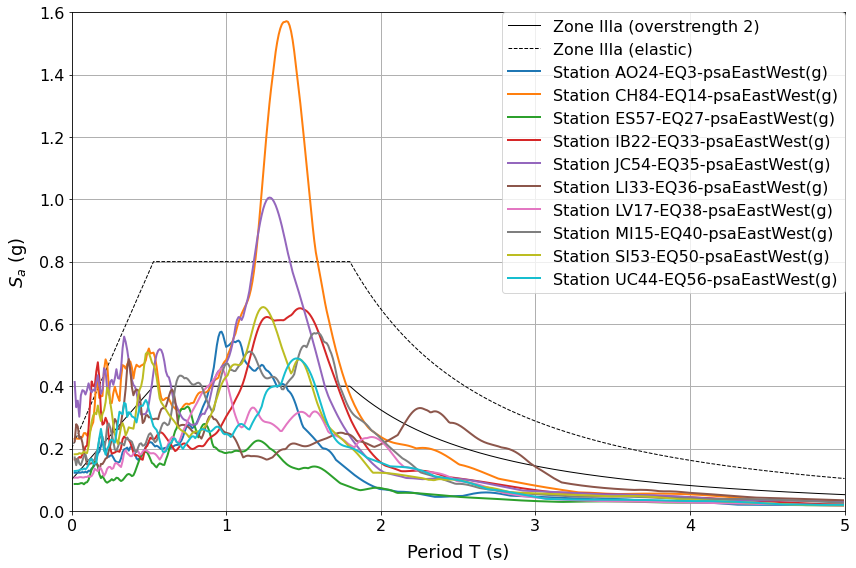

In [34]:
#fig, ax = plt.subplots()
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)

# Plot Design Response Spectrum
ax.plot(df_design_RS['T(s)'], df_design_RS['Zone IIIa (overstrength 2)'], linewidth=1, c='black', label='Zone IIIa (overstrength 2)')

# Plot Design Response Spectrum
ax.plot(df_design_RS['T(s)'], df_design_RS['Zone IIIa (elastic)'], linewidth=1, c='black', linestyle='--', label='Zone IIIa (elastic)')

# Plot North-South component
#for i in df_CIRES_ZoneIIIa_NorthSouth:
#    ax.plot(df_CIRES_ZoneIIIa['Time(s)'], df_CIRES_ZoneIIIa[i], linewidth=2, label='Station %s' %i)

# Plot East-West component
for i in df_CIRES_ZoneIIIa_EastWest: 
    ax.plot(df_CIRES_ZoneIIIa['Time(s)'], df_CIRES_ZoneIIIa[i], linewidth=2, label='Station %s' %i)

# Add line for period and spectral accelaration
x_x=[1.512,1.512]
y_y=[0.0,0.24]

x_x2=[0,1.512]
y_y2=[0.240,0.240]

#ax.plot(x_x, y_y, lw=4, c='green')
#ax.plot(x_x2, y_y2, lw=4, c='green')

# Set axes limits
ax.set_xlim(0,5)
ax.set_ylim(0,1.6)

# Tick parameters
ax.tick_params(axis="x", labelsize=16)
ax.tick_params(axis="y", labelsize=16)

# Axes titles
ax.set_xlabel('Period T (s)', fontsize = 18, labelpad=10)
ax.set_ylabel('$S_a$ (g)', fontsize = 18, labelpad=10)

# Grid lines
ax.grid(linewidth=1)

# Legend
ax.legend(loc=0, borderaxespad=0., prop={'size': 16})

plt.tight_layout()

# Export figure
fig.savefig("/homevol/sroe459/git_projects/2017-Puebla-Mexico-earthquake/Figures/spectrum_ZoneIIIa-EastWest.png", dpi=200)

### Zone IIIb (soft soil)

In [35]:
df_CIRES_ZoneIIIb.columns

Index(['Time(s)', 'AL01-EQ2-psaNorthSouth(g)', 'AL01-EQ2-psaEastWest(g)',
       'BL45-EQ8-psaNorthSouth(g)', 'BL45-EQ8-psaEastWest(g)',
       'CI05-EQ15-psaNorthSouth(g)', 'CI05-EQ15-psaEastWest(g)',
       'CJ03-EQ16-psaNorthSouth(g)', 'CJ03-EQ16-psaEastWest(g)',
       'CJ04-EQ17-psaNorthSouth(g)', 'CJ04-EQ17-psaEastWest(g)',
       'CO56-EQ19-psaNorthSouth(g)', 'CO56-EQ19-psaEastWest(g)',
       'GA62-EQ29-psaNorthSouth(g)', 'GA62-EQ29-psaEastWest(g)',
       'GC38-EQ30-psaNorthSouth(g)', 'GC38-EQ30-psaEastWest(g)',
       'LI58-EQ37-psaNorthSouth(g)', 'LI58-EQ37-psaEastWest(g)',
       'PE10-EQ47-psaNorthSouth(g)', 'PE10-EQ47-psaEastWest(g)',
       'RM48-EQ49-psaNorthSouth(g)', 'RM48-EQ49-psaEastWest(g)',
       'SP51-EQ51-psaNorthSouth(g)', 'SP51-EQ51-psaEastWest(g)',
       'TL08-EQ53-psaNorthSouth(g)', 'TL08-EQ53-psaEastWest(g)',
       'TL55-EQ54-psaNorthSouth(g)', 'TL55-EQ54-psaEastWest(g)',
       'VG09-EQ58-psaNorthSouth(g)', 'VG09-EQ58-psaEastWest(g)',
       'Median-Zon

In [36]:
df_CIRES_ZoneIIIb_NorthSouth = df_CIRES_ZoneIIIb[['AL01-EQ2-psaNorthSouth(g)',
                                                  'BL45-EQ8-psaNorthSouth(g)',
                                                  'CI05-EQ15-psaNorthSouth(g)', 
                                                  'CJ03-EQ16-psaNorthSouth(g)', 
                                                  'CJ04-EQ17-psaNorthSouth(g)', 
                                                  'CO56-EQ19-psaNorthSouth(g)', 
                                                  'GA62-EQ29-psaNorthSouth(g)',
                                                  'GC38-EQ30-psaNorthSouth(g)', 
                                                  'LI58-EQ37-psaNorthSouth(g)',
                                                  'PE10-EQ47-psaNorthSouth(g)', 
                                                  'RM48-EQ49-psaNorthSouth(g)', 
                                                  'SP51-EQ51-psaNorthSouth(g)', 
                                                  'TL08-EQ53-psaNorthSouth(g)', 
                                                  'TL55-EQ54-psaNorthSouth(g)', 
                                                  'VG09-EQ58-psaNorthSouth(g)']]

In [37]:
df_CIRES_ZoneIIIb_EastWest = df_CIRES_ZoneIIIb[['AL01-EQ2-psaEastWest(g)',
                                                'BL45-EQ8-psaEastWest(g)',
                                                'CI05-EQ15-psaEastWest(g)',
                                                'CJ03-EQ16-psaEastWest(g)',
                                                'CJ04-EQ17-psaEastWest(g)',
                                                'CO56-EQ19-psaEastWest(g)',
                                                'GA62-EQ29-psaEastWest(g)',
                                                'GC38-EQ30-psaEastWest(g)',
                                                'LI58-EQ37-psaEastWest(g)',
                                                'PE10-EQ47-psaEastWest(g)',
                                                'RM48-EQ49-psaEastWest(g)',
                                                'SP51-EQ51-psaEastWest(g)',
                                                'TL08-EQ53-psaEastWest(g)',
                                                'TL55-EQ54-psaEastWest(g)',
                                                'VG09-EQ58-psaEastWest(g)']]

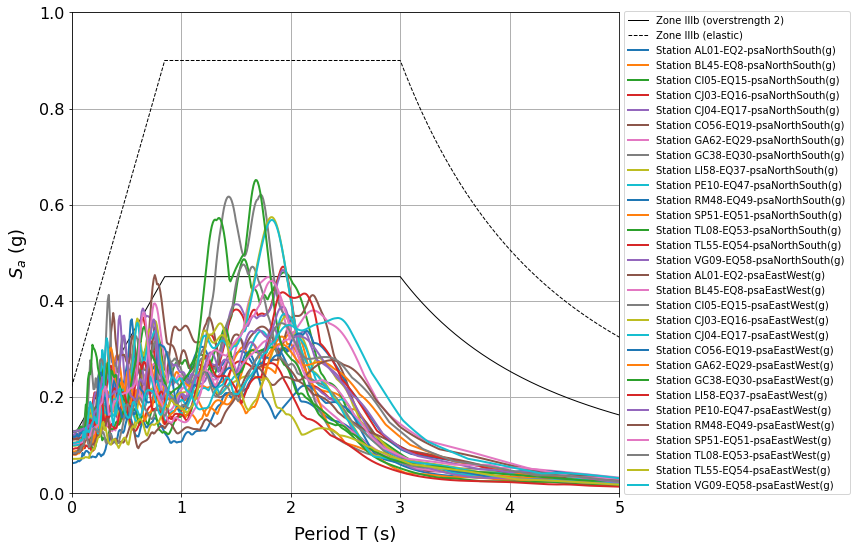

In [38]:
#fig, ax = plt.subplots()
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)

# Plot Design Response Spectrum
ax.plot(df_design_RS['T(s)'], df_design_RS['Zone IIIb (overstrength 2)'], linewidth=1, c='black', label='Zone IIIb (overstrength 2)')

# Plot Design Response Spectrum
ax.plot(df_design_RS['T(s)'], df_design_RS['Zone IIIb (elastic)'], linewidth=1, c='black', linestyle='--', label='Zone IIIb (elastic)')

# Plot North-South component
for i in df_CIRES_ZoneIIIb_NorthSouth:
    ax.plot(df_CIRES_ZoneIIIb['Time(s)'], df_CIRES_ZoneIIIb[i], linewidth=2, label='Station %s' %i)

# Plot East-West component
for i in df_CIRES_ZoneIIIb_EastWest: 
    ax.plot(df_CIRES_ZoneIIIb['Time(s)'], df_CIRES_ZoneIIIb[i], linewidth=2, label='Station %s' %i)

# Add line for period and spectral acceleration
x_x=[1.512,1.512]
y_y=[0.0,0.24]

x_x2=[0,1.512]
y_y2=[0.240,0.240]

#ax.plot(x_x, y_y, lw=4, c='green')
#ax.plot(x_x2, y_y2, lw=4, c='green')

# Set axes limits
ax.set_xlim(0,5)
ax.set_ylim(0,1.0)

# Tick parameters
ax.tick_params(axis="x", labelsize=16)
ax.tick_params(axis="y", labelsize=16)

# Axes titles
ax.set_xlabel('Period T (s)', fontsize = 18, labelpad=10)
ax.set_ylabel('$S_a$ (g)', fontsize = 18, labelpad=10)

# Grid lines
ax.grid(linewidth=1)

# Legend
box = ax.get_position()
#ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 10})

plt.tight_layout()

# Export figure
fig.savefig("/homevol/sroe459/git_projects/2017-Puebla-Mexico-earthquake/Figures/spectrum_ZoneIIIb.png", dpi=200)

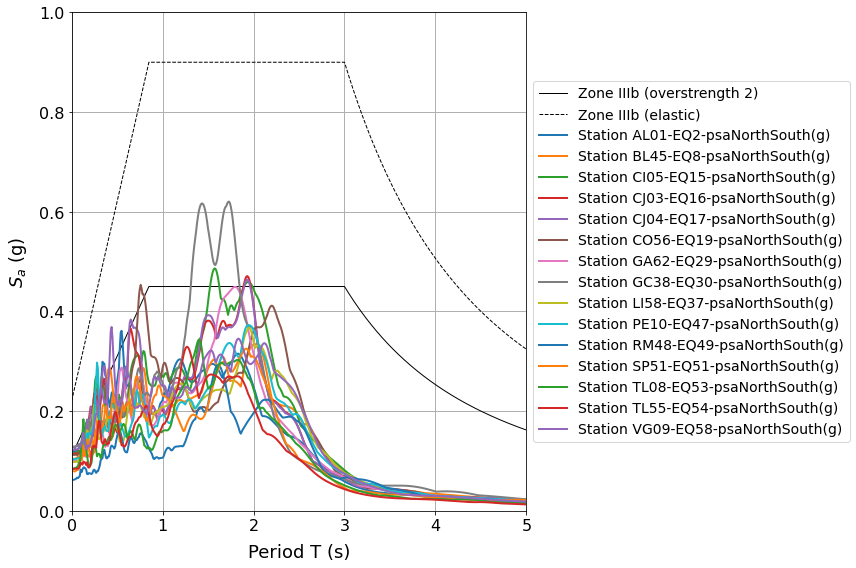

In [39]:
#fig, ax = plt.subplots()
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)

# Plot Design Response Spectrum
ax.plot(df_design_RS['T(s)'], df_design_RS['Zone IIIb (overstrength 2)'], linewidth=1, c='black', label='Zone IIIb (overstrength 2)')

# Plot Design Response Spectrum
ax.plot(df_design_RS['T(s)'], df_design_RS['Zone IIIb (elastic)'], linewidth=1, c='black', linestyle='--', label='Zone IIIb (elastic)')

# Plot North-South component
for i in df_CIRES_ZoneIIIb_NorthSouth:
    ax.plot(df_CIRES_ZoneIIIb['Time(s)'], df_CIRES_ZoneIIIb[i], linewidth=2, label='Station %s' %i)

# Plot East-West component
#for i in df_CIRES_ZoneIIIb_EastWest: 
#    ax.plot(df_CIRES_ZoneIIIb['Time(s)'], df_CIRES_ZoneIIIb[i], linewidth=2, label='Station %s' %i)

# Add line for period and spectral acceleration
x_x=[1.512,1.512]
y_y=[0.0,0.24]

x_x2=[0,1.512]
y_y2=[0.240,0.240]

#ax.plot(x_x, y_y, lw=4, c='green')
#ax.plot(x_x2, y_y2, lw=4, c='green')

# Set axes limits
ax.set_xlim(0,5)
ax.set_ylim(0,1.0)

# Tick parameters
ax.tick_params(axis="x", labelsize=16)
ax.tick_params(axis="y", labelsize=16)

# Axes titles
ax.set_xlabel('Period T (s)', fontsize = 18, labelpad=10)
ax.set_ylabel('$S_a$ (g)', fontsize = 18, labelpad=10)

# Grid lines
ax.grid(linewidth=1)

# Legend
box = ax.get_position()
#ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 14})

plt.tight_layout()

# Export figure
fig.savefig("/homevol/sroe459/git_projects/2017-Puebla-Mexico-earthquake/Figures/spectrum_ZoneIIIb-NorthSouth.png", dpi=200)

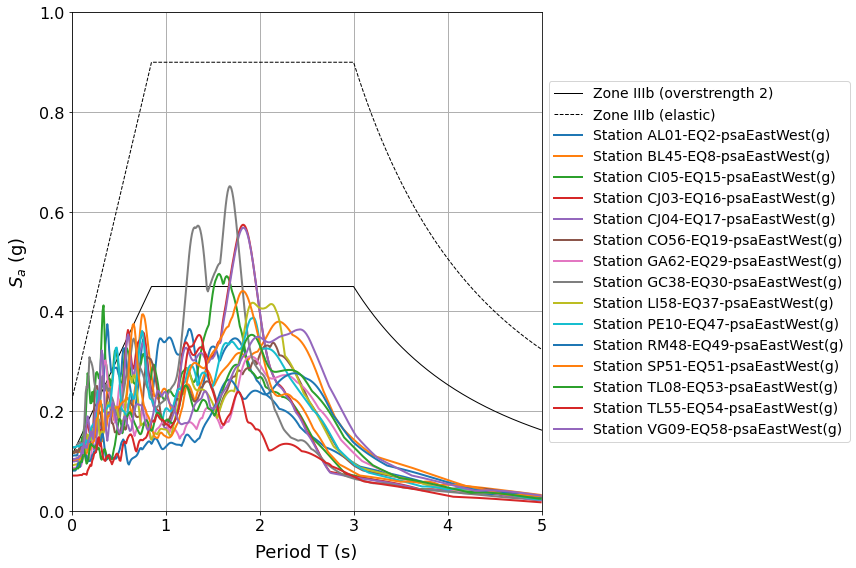

In [40]:
#fig, ax = plt.subplots()
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)

# Plot Design Response Spectrum
ax.plot(df_design_RS['T(s)'], df_design_RS['Zone IIIb (overstrength 2)'], linewidth=1, c='black', label='Zone IIIb (overstrength 2)')

# Plot Design Response Spectrum
ax.plot(df_design_RS['T(s)'], df_design_RS['Zone IIIb (elastic)'], linewidth=1, c='black', linestyle='--', label='Zone IIIb (elastic)')

# Plot North-South component
#for i in df_CIRES_ZoneIIIb_NorthSouth:
#    ax.plot(df_CIRES_ZoneIIIb['Time(s)'], df_CIRES_ZoneIIIb[i], linewidth=2, label='Station %s' %i)

# Plot East-West component
for i in df_CIRES_ZoneIIIb_EastWest: 
    ax.plot(df_CIRES_ZoneIIIb['Time(s)'], df_CIRES_ZoneIIIb[i], linewidth=2, label='Station %s' %i)

# Add line for period and spectral acceleration
x_x=[1.512,1.512]
y_y=[0.0,0.24]

x_x2=[0,1.512]
y_y2=[0.240,0.240]

#ax.plot(x_x, y_y, lw=4, c='green')
#ax.plot(x_x2, y_y2, lw=4, c='green')

# Set axes limits
ax.set_xlim(0,5)
ax.set_ylim(0,1.0)

# Tick parameters
ax.tick_params(axis="x", labelsize=16)
ax.tick_params(axis="y", labelsize=16)

# Axes titles
ax.set_xlabel('Period T (s)', fontsize = 18, labelpad=10)
ax.set_ylabel('$S_a$ (g)', fontsize = 18, labelpad=10)

# Grid lines
ax.grid(linewidth=1)

# Legend
box = ax.get_position()
#ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 14})

plt.tight_layout()

# Export figure
fig.savefig("/homevol/sroe459/git_projects/2017-Puebla-Mexico-earthquake/Figures/spectrum_ZoneIIIb-EastWest.png", dpi=200)

### Zone IIIc (soft soil)

In [41]:
df_CIRES_ZoneIIIc.columns

Index(['Time(s)', 'AP68-EQ4-psaNorthSouth(g)', 'AP68-EQ4-psaEastWest(g)',
       'BA49-EQ7-psaNorthSouth(g)', 'BA49-EQ7-psaEastWest(g)',
       'BO39-EQ9-psaNorthSouth(g)', 'BO39-EQ9-psaEastWest(g)',
       'CA59-EQ10-psaNorthSouth(g)', 'CA59-EQ10-psaEastWest(g)',
       'CU80-EQ22-psaNorthSouth(g)', 'CU80-EQ22-psaEastWest(g)',
       'HJ72-EQ32-psaNorthSouth(g)', 'HJ72-EQ32-psaEastWest(g)',
       'JA43-EQ34-psaNorthSouth(g)', 'JA43-EQ34-psaEastWest(g)',
       'MY19-EQ42-psaNorthSouth(g)', 'MY19-EQ42-psaEastWest(g)',
       'RI76-EQ48-psaNorthSouth(g)', 'RI76-EQ48-psaEastWest(g)',
       'VM29-EQ59-psaNorthSouth(g)', 'VM29-EQ59-psaEastWest(g)',
       'XP06-EQ61-psaNorthSouth(g)', 'XP06-EQ61-psaEastWest(g)',
       'Median-ZoneIIIc-psaNorthSouth(g)',
       'StandardDev-ZoneIIIc-psaNorthSouth(g)',
       'Median-ZoneIIIc-psaEastWest(g)',
       'StandardDev-ZoneIIIc-psaEastWest(g)'],
      dtype='object')

In [42]:
df_CIRES_ZoneIIIc_NorthSouth = df_CIRES_ZoneIIIc[['AP68-EQ4-psaNorthSouth(g)',
                                                  'BA49-EQ7-psaNorthSouth(g)',
                                                  'BO39-EQ9-psaNorthSouth(g)',
                                                  'CA59-EQ10-psaNorthSouth(g)',
                                                  'CU80-EQ22-psaNorthSouth(g)',
                                                  'HJ72-EQ32-psaNorthSouth(g)',
                                                  'JA43-EQ34-psaNorthSouth(g)',
                                                  'MY19-EQ42-psaNorthSouth(g)',
                                                  'RI76-EQ48-psaNorthSouth(g)',
                                                  'VM29-EQ59-psaNorthSouth(g)',
                                                  'XP06-EQ61-psaNorthSouth(g)']]

In [43]:
df_CIRES_ZoneIIIc_EastWest = df_CIRES_ZoneIIIc[['AP68-EQ4-psaEastWest(g)',
                                                'BA49-EQ7-psaEastWest(g)',
                                                'BO39-EQ9-psaEastWest(g)',
                                                'CA59-EQ10-psaEastWest(g)',
                                                'CU80-EQ22-psaEastWest(g)',
                                                'HJ72-EQ32-psaEastWest(g)',
                                                'JA43-EQ34-psaEastWest(g)',
                                                'MY19-EQ42-psaEastWest(g)',
                                                'RI76-EQ48-psaEastWest(g)',
                                                'VM29-EQ59-psaEastWest(g)',
                                                'XP06-EQ61-psaEastWest(g)']]

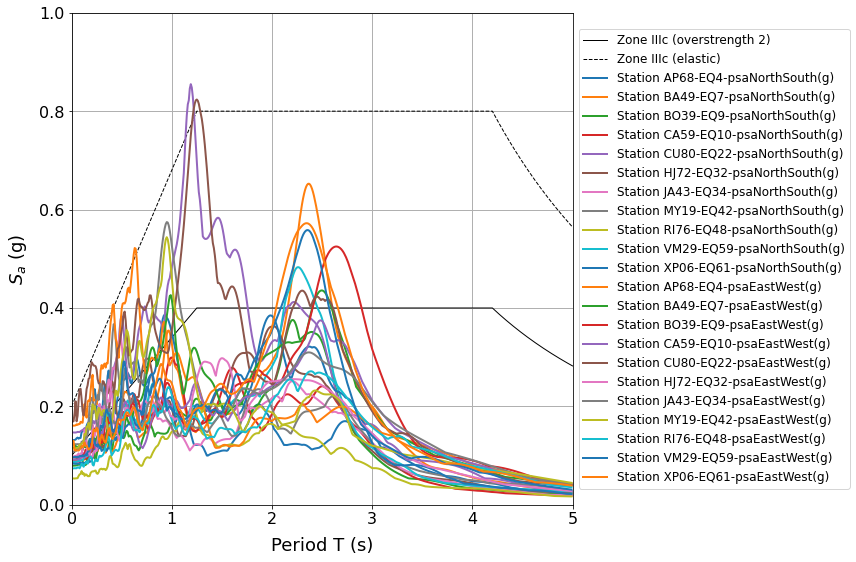

In [44]:
#fig, ax = plt.subplots()
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)

# Plot Design Response Spectrum
ax.plot(df_design_RS['T(s)'], df_design_RS['Zone IIIc (overstrength 2)'], linewidth=1, c='black', label='Zone IIIc (overstrength 2)')

# Plot Design Response Spectrum
ax.plot(df_design_RS['T(s)'], df_design_RS['Zone IIIc (elastic)'], linewidth=1, c='black', linestyle='--', label='Zone IIIc (elastic)')

# Plot North-South component
for i in df_CIRES_ZoneIIIc_NorthSouth:
    ax.plot(df_CIRES_ZoneIIIc['Time(s)'], df_CIRES_ZoneIIIc[i], linewidth=2, label='Station %s' %i)

# Plot East-West component
for i in df_CIRES_ZoneIIIc_EastWest: 
    ax.plot(df_CIRES_ZoneIIIc['Time(s)'], df_CIRES_ZoneIIIc[i], linewidth=2, label='Station %s' %i)

# Add line for period and spectral acceleration
x_x=[1.512,1.512]
y_y=[0.0,0.24]

x_x2=[0,1.512]
y_y2=[0.240,0.240]

#ax.plot(x_x, y_y, lw=4, c='green')
#ax.plot(x_x2, y_y2, lw=4, c='green')

# Set axes limits
ax.set_xlim(0,5)
ax.set_ylim(0,1.0)

# Tick parameters
ax.tick_params(axis="x", labelsize=16)
ax.tick_params(axis="y", labelsize=16)

# Axes titles
ax.set_xlabel('Period T (s)', fontsize = 18, labelpad=10)
ax.set_ylabel('$S_a$ (g)', fontsize = 18, labelpad=10)

# Grid lines
ax.grid(linewidth=1)

# Legend
box = ax.get_position()
#ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 12})

plt.tight_layout()

# Export figure
fig.savefig("/homevol/sroe459/git_projects/2017-Puebla-Mexico-earthquake/Figures/spectrum_ZoneIIIc.png", dpi=200)

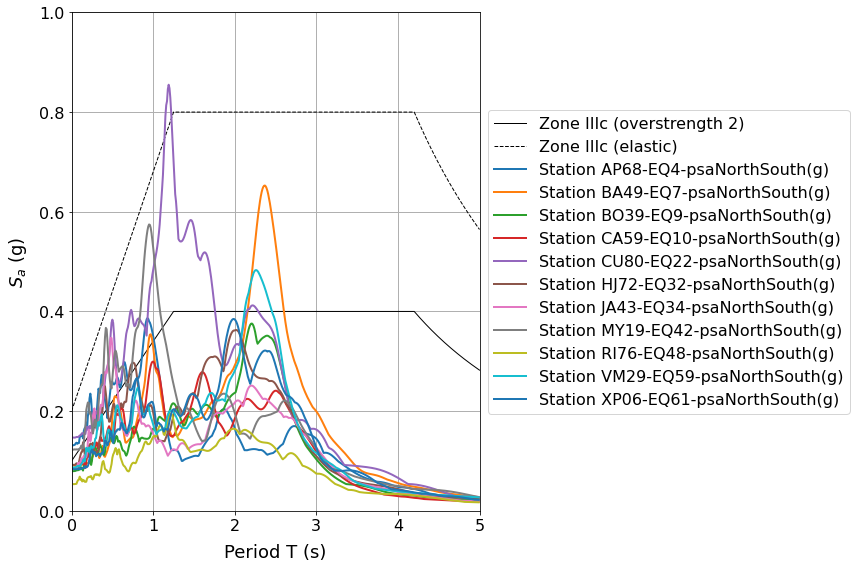

In [45]:
#fig, ax = plt.subplots()
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)

# Plot Design Response Spectrum
ax.plot(df_design_RS['T(s)'], df_design_RS['Zone IIIc (overstrength 2)'], linewidth=1, c='black', label='Zone IIIc (overstrength 2)')

# Plot Design Response Spectrum
ax.plot(df_design_RS['T(s)'], df_design_RS['Zone IIIc (elastic)'], linewidth=1, c='black', linestyle='--', label='Zone IIIc (elastic)')

# Plot North-South component
for i in df_CIRES_ZoneIIIc_NorthSouth:
    ax.plot(df_CIRES_ZoneIIIc['Time(s)'], df_CIRES_ZoneIIIc[i], linewidth=2, label='Station %s' %i)

# Plot East-West component
#for i in df_CIRES_ZoneIIIc_EastWest: 
#    ax.plot(df_CIRES_ZoneIIIc['Time(s)'], df_CIRES_ZoneIIIc[i], linewidth=2, label='Station %s' %i)

# Add line for period and spectral acceleration
x_x=[1.512,1.512]
y_y=[0.0,0.24]

x_x2=[0,1.512]
y_y2=[0.240,0.240]

#ax.plot(x_x, y_y, lw=4, c='green')
#ax.plot(x_x2, y_y2, lw=4, c='green')

# Set axes limits
ax.set_xlim(0,5)
ax.set_ylim(0,1.0)

# Tick parameters
ax.tick_params(axis="x", labelsize=16)
ax.tick_params(axis="y", labelsize=16)

# Axes titles
ax.set_xlabel('Period T (s)', fontsize = 18, labelpad=10)
ax.set_ylabel('$S_a$ (g)', fontsize = 18, labelpad=10)

# Grid lines
ax.grid(linewidth=1)

# Legend
box = ax.get_position()
#ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 16})

plt.tight_layout()

# Export figure
fig.savefig("/homevol/sroe459/git_projects/2017-Puebla-Mexico-earthquake/Figures/spectrum_ZoneIIIc-NorthSouth.png", dpi=200)

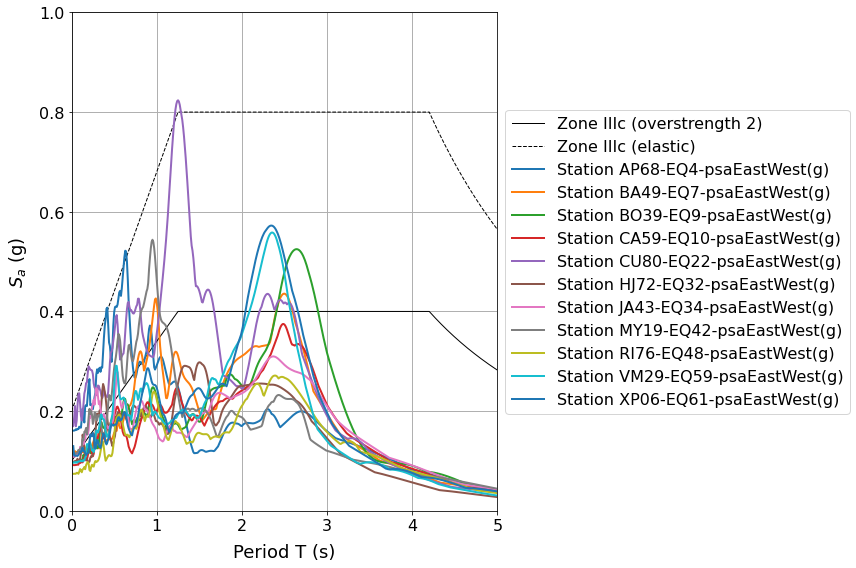

In [46]:
#fig, ax = plt.subplots()
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)

# Plot Design Response Spectrum
ax.plot(df_design_RS['T(s)'], df_design_RS['Zone IIIc (overstrength 2)'], linewidth=1, c='black', label='Zone IIIc (overstrength 2)')

# Plot Design Response Spectrum
ax.plot(df_design_RS['T(s)'], df_design_RS['Zone IIIc (elastic)'], linewidth=1, c='black', linestyle='--', label='Zone IIIc (elastic)')

# Plot North-South component
#for i in df_CIRES_ZoneIIIc_NorthSouth:
#    ax.plot(df_CIRES_ZoneIIIc['Time(s)'], df_CIRES_ZoneIIIc[i], linewidth=2, label='Station %s' %i)

# Plot East-West component
for i in df_CIRES_ZoneIIIc_EastWest: 
    ax.plot(df_CIRES_ZoneIIIc['Time(s)'], df_CIRES_ZoneIIIc[i], linewidth=2, label='Station %s' %i)

# Add line for period and spectral acceleration
x_x=[1.512,1.512]
y_y=[0.0,0.24]

x_x2=[0,1.512]
y_y2=[0.240,0.240]

#ax.plot(x_x, y_y, lw=4, c='green')
#ax.plot(x_x2, y_y2, lw=4, c='green')

# Set axes limits
ax.set_xlim(0,5)
ax.set_ylim(0,1.0)

# Tick parameters
ax.tick_params(axis="x", labelsize=16)
ax.tick_params(axis="y", labelsize=16)

# Axes titles
ax.set_xlabel('Period T (s)', fontsize = 18, labelpad=10)
ax.set_ylabel('$S_a$ (g)', fontsize = 18, labelpad=10)

# Grid lines
ax.grid(linewidth=1)

# Legend
box = ax.get_position()
#ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 16})

plt.tight_layout()

# Export figure
fig.savefig("/homevol/sroe459/git_projects/2017-Puebla-Mexico-earthquake/Figures/spectrum_ZoneIIIc-EastWest.png", dpi=200)

### Zone IIId (soft soil)

In [47]:
df_CIRES_ZoneIIId.columns

Index(['Time(s)', 'AE02-EQ1-psaNorthSouth(g)', 'AE02-EQ1-psaEastWest(g)',
       'AU11-EQ5-psaNorthSouth(g)', 'AU11-EQ5-psaEastWest(g)',
       'CE23-EQ12-psaNorthSouth(g)', 'CE23-EQ12-psaEastWest(g)',
       'CE32-EQ13-psaNorthSouth(g)', 'CE32-EQ13-psaEastWest(g)',
       'CP28-EQ20-psaNorthSouth(g)', 'CP28-EQ20-psaEastWest(g)',
       'DM12-EQ23-psaNorthSouth(g)', 'DM12-EQ23-psaEastWest(g)',
       'NZ20-EQ43-psaNorthSouth(g)', 'NZ20-EQ43-psaEastWest(g)',
       'NZ31-EQ44-psaNorthSouth(g)', 'NZ31-EQ44-psaEastWest(g)',
       'PD42-EQ46-psaNorthSouth(g)', 'PD42-EQ46-psaEastWest(g)',
       'TH35-EQ52-psaNorthSouth(g)', 'TH35-EQ52-psaEastWest(g)',
       'XO36-EQ60-psaNorthSouth(g)', 'XO36-EQ60-psaEastWest(g)',
       'Median-ZoneIIId-psaNorthSouth(g)',
       'StandardDev-ZoneIIId-psaNorthSouth(g)',
       'Median-ZoneIIId-psaEastWest(g)',
       'StandardDev-ZoneIIId-psaEastWest(g)'],
      dtype='object')

In [48]:
df_CIRES_ZoneIIId_NorthSouth = df_CIRES_ZoneIIId[['AE02-EQ1-psaNorthSouth(g)',
                                                  'AU11-EQ5-psaNorthSouth(g)',
                                                  'CE23-EQ12-psaNorthSouth(g)',
                                                  'CE32-EQ13-psaNorthSouth(g)',
                                                  'CP28-EQ20-psaNorthSouth(g)',
                                                  'DM12-EQ23-psaNorthSouth(g)',
                                                  'NZ20-EQ43-psaNorthSouth(g)',
                                                  'NZ31-EQ44-psaNorthSouth(g)',
                                                  'PD42-EQ46-psaNorthSouth(g)',
                                                  'TH35-EQ52-psaNorthSouth(g)',
                                                  'XO36-EQ60-psaNorthSouth(g)']]

In [49]:
df_CIRES_ZoneIIId_EastWest = df_CIRES_ZoneIIId[['AE02-EQ1-psaEastWest(g)',
                                                'AU11-EQ5-psaEastWest(g)',
                                                'CE23-EQ12-psaEastWest(g)',
                                                'CE32-EQ13-psaEastWest(g)',
                                                'CP28-EQ20-psaEastWest(g)',
                                                'DM12-EQ23-psaEastWest(g)',
                                                'NZ20-EQ43-psaEastWest(g)',
                                                'NZ31-EQ44-psaEastWest(g)',
                                                'PD42-EQ46-psaEastWest(g)',
                                                'TH35-EQ52-psaEastWest(g)',
                                                'XO36-EQ60-psaEastWest(g)']]

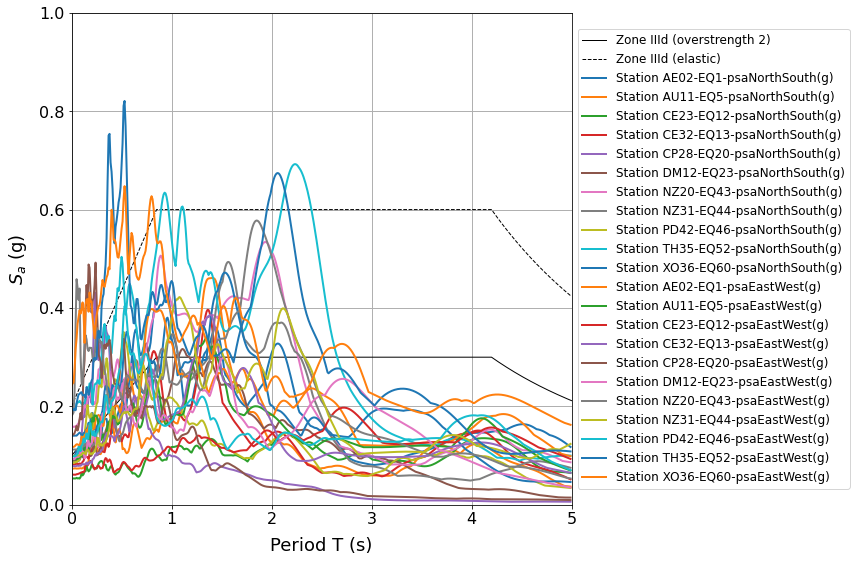

In [50]:
#fig, ax = plt.subplots()
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)

# Plot Design Response Spectrum
ax.plot(df_design_RS['T(s)'], df_design_RS['Zone IIId (overstrength 2)'], linewidth=1, c='black', label='Zone IIId (overstrength 2)')

# Plot Design Response Spectrum
ax.plot(df_design_RS['T(s)'], df_design_RS['Zone IIId (elastic)'], linewidth=1, c='black', linestyle='--', label='Zone IIId (elastic)')

# Plot North-South component
for i in df_CIRES_ZoneIIId_NorthSouth:
    ax.plot(df_CIRES_ZoneIIId['Time(s)'], df_CIRES_ZoneIIId[i], linewidth=2, label='Station %s' %i)

# Plot East-West component
for i in df_CIRES_ZoneIIId_EastWest: 
    ax.plot(df_CIRES_ZoneIIId['Time(s)'], df_CIRES_ZoneIIId[i], linewidth=2, label='Station %s' %i)

# Add line for period and spectral acceleration
x_x=[1.512,1.512]
y_y=[0.0,0.24]

x_x2=[0,1.512]
y_y2=[0.240,0.240]

#ax.plot(x_x, y_y, lw=4, c='green')
#ax.plot(x_x2, y_y2, lw=4, c='green')

# Set axes limits
ax.set_xlim(0,5)
ax.set_ylim(0,1.0)

# Tick parameters
ax.tick_params(axis="x", labelsize=16)
ax.tick_params(axis="y", labelsize=16)

# Axes titles
ax.set_xlabel('Period T (s)', fontsize = 18, labelpad=10)
ax.set_ylabel('$S_a$ (g)', fontsize = 18, labelpad=10)

# Grid lines
ax.grid(linewidth=1)

# Legend
box = ax.get_position()
#ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 12})

plt.tight_layout()

# Export figure
fig.savefig("/homevol/sroe459/git_projects/2017-Puebla-Mexico-earthquake/Figures/spectrum_ZoneIIId.png", dpi=200)

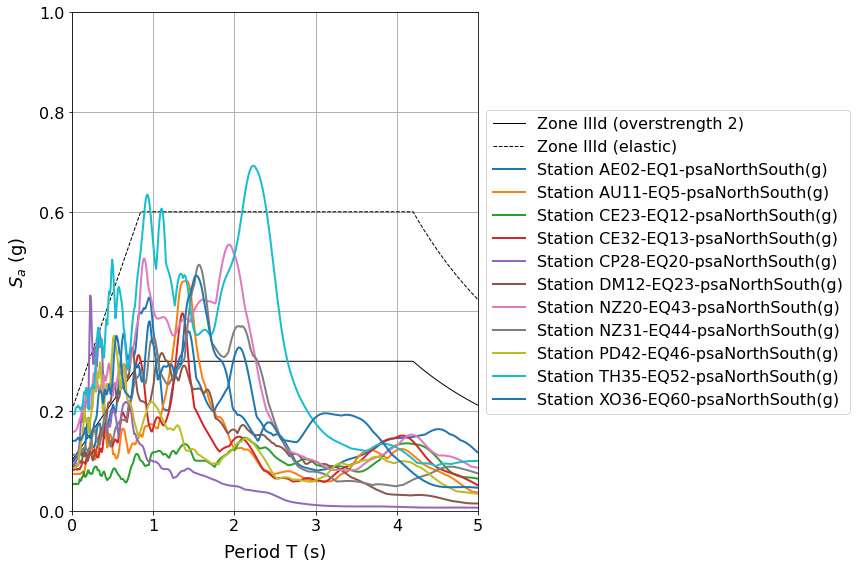

In [51]:
#fig, ax = plt.subplots()
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)

# Plot Design Response Spectrum
ax.plot(df_design_RS['T(s)'], df_design_RS['Zone IIId (overstrength 2)'], linewidth=1, c='black', label='Zone IIId (overstrength 2)')

# Plot Design Response Spectrum
ax.plot(df_design_RS['T(s)'], df_design_RS['Zone IIId (elastic)'], linewidth=1, c='black', linestyle='--', label='Zone IIId (elastic)')

# Plot North-South component
for i in df_CIRES_ZoneIIId_NorthSouth:
    ax.plot(df_CIRES_ZoneIIId['Time(s)'], df_CIRES_ZoneIIId[i], linewidth=2, label='Station %s' %i)

# Plot East-West component
#for i in df_CIRES_ZoneIIId_EastWest: 
#    ax.plot(df_CIRES_ZoneIIId['Time(s)'], df_CIRES_ZoneIIId[i], linewidth=2, label='Station %s' %i)

# Add line for period and spectral acceleration
x_x=[1.512,1.512]
y_y=[0.0,0.24]

x_x2=[0,1.512]
y_y2=[0.240,0.240]

#ax.plot(x_x, y_y, lw=4, c='green')
#ax.plot(x_x2, y_y2, lw=4, c='green')

# Set axes limits
ax.set_xlim(0,5)
ax.set_ylim(0,1.0)

# Tick parameters
ax.tick_params(axis="x", labelsize=16)
ax.tick_params(axis="y", labelsize=16)

# Axes titles
ax.set_xlabel('Period T (s)', fontsize = 18, labelpad=10)
ax.set_ylabel('$S_a$ (g)', fontsize = 18, labelpad=10)

# Grid lines
ax.grid(linewidth=1)

# Legend
box = ax.get_position()
#ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 16})

plt.tight_layout()

# Export figure
fig.savefig("/homevol/sroe459/git_projects/2017-Puebla-Mexico-earthquake/Figures/spectrum_ZoneIIId-NorthSouth.png", dpi=200)

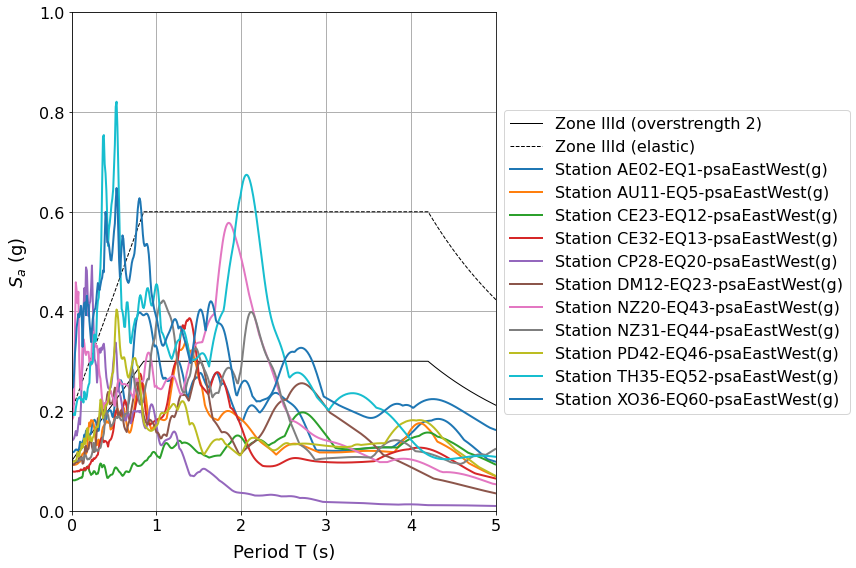

In [52]:
#fig, ax = plt.subplots()
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)

# Plot Design Response Spectrum
ax.plot(df_design_RS['T(s)'], df_design_RS['Zone IIId (overstrength 2)'], linewidth=1, c='black', label='Zone IIId (overstrength 2)')

# Plot Design Response Spectrum
ax.plot(df_design_RS['T(s)'], df_design_RS['Zone IIId (elastic)'], linewidth=1, c='black', linestyle='--', label='Zone IIId (elastic)')

# Plot North-South component
#for i in df_CIRES_ZoneIIId_NorthSouth:
#    ax.plot(df_CIRES_ZoneIIId['Time(s)'], df_CIRES_ZoneIIId[i], linewidth=2, label='Station %s' %i)

# Plot East-West component
for i in df_CIRES_ZoneIIId_EastWest: 
    ax.plot(df_CIRES_ZoneIIId['Time(s)'], df_CIRES_ZoneIIId[i], linewidth=2, label='Station %s' %i)

# Add line for period and spectral acceleration
x_x=[1.512,1.512]
y_y=[0.0,0.24]

x_x2=[0,1.512]
y_y2=[0.240,0.240]

#ax.plot(x_x, y_y, lw=4, c='green')
#ax.plot(x_x2, y_y2, lw=4, c='green')

# Set axes limits
ax.set_xlim(0,5)
ax.set_ylim(0,1.0)

# Tick parameters
ax.tick_params(axis="x", labelsize=16)
ax.tick_params(axis="y", labelsize=16)

# Axes titles
ax.set_xlabel('Period T (s)', fontsize = 18, labelpad=10)
ax.set_ylabel('$S_a$ (g)', fontsize = 18, labelpad=10)

# Grid lines
ax.grid(linewidth=1)

# Legend
box = ax.get_position()
#ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 16})

plt.tight_layout()

# Export figure
fig.savefig("/homevol/sroe459/git_projects/2017-Puebla-Mexico-earthquake/Figures/spectrum_ZoneIIId-EastWest.png", dpi=200)

### Median

In [53]:
# Extract data related to median
df_CIRES_ZoneI_Median = df_CIRES_ZoneI[['Time(s)','Median-ZoneI-psaNorthSouth(g)', 'Median-ZoneI-psaEastWest(g)']]
df_CIRES_ZoneII_Median = df_CIRES_ZoneII[['Time(s)','Median-ZoneII-psaNorthSouth(g)', 'Median-ZoneII-psaEastWest(g)']]
df_CIRES_ZoneIIIa_Median = df_CIRES_ZoneIIIa[['Time(s)','Median-ZoneIIIa-psaNorthSouth(g)', 'Median-ZoneIIIa-psaEastWest(g)']]
df_CIRES_ZoneIIIb_Median = df_CIRES_ZoneIIIb[['Time(s)','Median-ZoneIIIb-psaNorthSouth(g)', 'Median-ZoneIIIb-psaEastWest(g)']]
df_CIRES_ZoneIIIc_Median = df_CIRES_ZoneIIIc[['Time(s)','Median-ZoneIIIc-psaNorthSouth(g)', 'Median-ZoneIIIc-psaEastWest(g)']]
df_CIRES_ZoneIIId_Median = df_CIRES_ZoneIIId[['Time(s)','Median-ZoneIIId-psaNorthSouth(g)', 'Median-ZoneIIId-psaEastWest(g)']]

In [54]:
# compile the list of dataframes you want to merge
data_frames = [df_CIRES_ZoneI_Median, df_CIRES_ZoneII_Median, df_CIRES_ZoneIIIa_Median, df_CIRES_ZoneIIIb_Median, df_CIRES_ZoneIIIc_Median, df_CIRES_ZoneIIId_Median]

df_CIRES_allZones_Median = reduce(lambda  left,right: pd.merge(left,right,on='Time(s)', how='left'), data_frames)

In [55]:
df_CIRES_allZones_Median

Time(s)  Median-ZoneI-psaNorthSouth(g)  Median-ZoneI-psaEastWest(g)  \
0       0.00                            NaN                          NaN   
1       0.01                            NaN                          NaN   
2       0.02                       0.077791                     0.069385   
3       0.03                       0.082251                     0.068640   
4       0.04                       0.082598                     0.069883   
..       ...                            ...                          ...   
495     4.95                       0.012484                     0.012430   
496     4.96                       0.012432                     0.012304   
497     4.97                       0.012380                     0.012177   
498     4.98                       0.012326                     0.012052   
499     4.99                       0.012271                     0.011930   

     Median-ZoneII-psaNorthSouth(g)  Median-ZoneII-psaEastWest(g)  \
0                               NaN                           NaN   
1                               NaN                           NaN   
2                          0.073840                      0.096450   
3                          0.074234                      0.096470   
4                          0.074817                      0.097050   
..                              ...                           ...   
495                        0.012107                      0.015552   
496                        0.012134                      0.015494   
497                        0.012159                      0.015436   
498                        0.012182                      0.015377   
499                        0.012203                      0.015318   

     Median-ZoneIIIa-psaNorthSouth(g)  Median-ZoneIIIa-psaEastWest(g)  \
0                                 NaN                             NaN   
1                                 NaN                             NaN   
2                            0.129687                        0.168265   
3                            0.130090                        0.155944   
4                            0.131388                        0.167052   
..                                ...                             ...   
495                          0.019823                        0.020039   
496                          0.019747                        0.020017   
497                          0.019669                        0.019994   
498                          0.019591                        0.019970   
499                          0.019551                        0.019943   

     Median-ZoneIIIb-psaNorthSouth(g)  Median-ZoneIIIb-psaEastWest(g)  \
0                                 NaN                             NaN   
1                                 NaN                             NaN   
2                            0.104508                        0.102504   
3                            0.104415                        0.102675   
4                            0.104610                        0.102810   
..                                ...                             ...   
495                          0.020208                        0.024732   
496                          0.020117                        0.024635   
497                          0.020025                        0.024589   
498                          0.019932                        0.024540   
499                          0.019839                        0.024489   

     Median-ZoneIIIc-psaNorthSouth(g)  Median-ZoneIIIc-psaEastWest(g)  \
0                                 NaN                             NaN   
1                                 NaN                             NaN   
2                            0.086887                        0.108363   
3                            0.087085                        0.108795   
4                            0.087095                        0.108807   
..                                ...                             ...  

In [56]:
df_CIRES_allZones_Median.columns

Index(['Time(s)', 'Median-ZoneI-psaNorthSouth(g)',
       'Median-ZoneI-psaEastWest(g)', 'Median-ZoneII-psaNorthSouth(g)',
       'Median-ZoneII-psaEastWest(g)', 'Median-ZoneIIIa-psaNorthSouth(g)',
       'Median-ZoneIIIa-psaEastWest(g)', 'Median-ZoneIIIb-psaNorthSouth(g)',
       'Median-ZoneIIIb-psaEastWest(g)', 'Median-ZoneIIIc-psaNorthSouth(g)',
       'Median-ZoneIIIc-psaEastWest(g)', 'Median-ZoneIIId-psaNorthSouth(g)',
       'Median-ZoneIIId-psaEastWest(g)'],
      dtype='object')

In [57]:
# Median NorthSouth
df_CIRES_allZones_Median_NorthSouth = ['Median-ZoneI-psaNorthSouth(g)',
                                       'Median-ZoneII-psaNorthSouth(g)',
                                       'Median-ZoneIIIa-psaNorthSouth(g)',
                                       'Median-ZoneIIIb-psaNorthSouth(g)',
                                       'Median-ZoneIIIc-psaNorthSouth(g)',
                                       'Median-ZoneIIId-psaNorthSouth(g)']

In [58]:
# Median EastWest
df_CIRES_allZones_Median_EastWest = ['Median-ZoneI-psaEastWest(g)',
                                     'Median-ZoneII-psaEastWest(g)',
                                     'Median-ZoneIIIa-psaEastWest(g)',
                                     'Median-ZoneIIIb-psaEastWest(g)',
                                     'Median-ZoneIIIc-psaEastWest(g)',
                                     'Median-ZoneIIId-psaEastWest(g)']

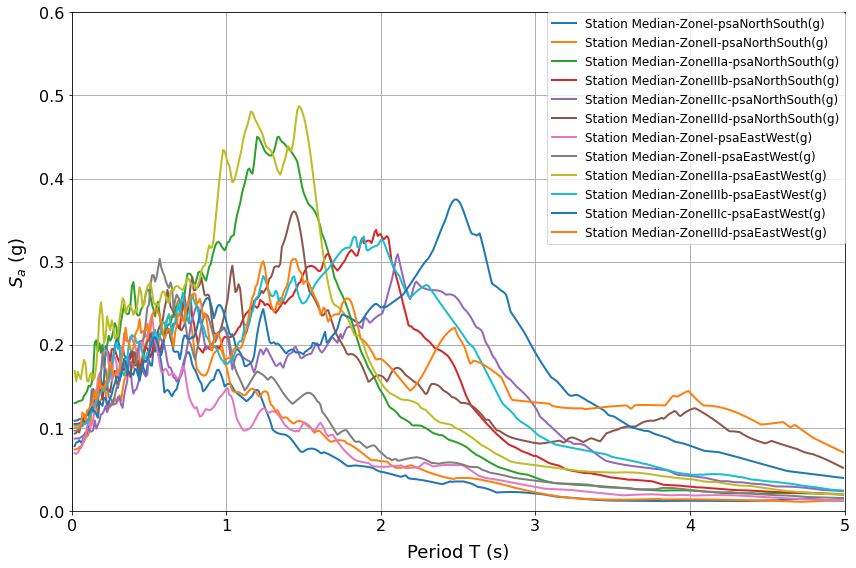

In [59]:
#fig, ax = plt.subplots()
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)

# Plot North-South component
for i in df_CIRES_allZones_Median_NorthSouth:
    ax.plot(df_CIRES_allZones_Median['Time(s)'], df_CIRES_allZones_Median[i], linewidth=2, label='Station %s' %i)

# Plot East-West component
for i in df_CIRES_allZones_Median_EastWest: 
    ax.plot(df_CIRES_allZones_Median['Time(s)'], df_CIRES_allZones_Median[i], linewidth=2, label='Station %s' %i)

# Add line for period and spectral acceleration
x_x=[1.512,1.512]
y_y=[0.0,0.24]

x_x2=[0,1.512]
y_y2=[0.240,0.240]

#ax.plot(x_x, y_y, lw=4, c='green')
#ax.plot(x_x2, y_y2, lw=4, c='green')

# Set axes limits
ax.set_xlim(0,5)
ax.set_ylim(0,0.6)

# Tick parameters
ax.tick_params(axis="x", labelsize=16)
ax.tick_params(axis="y", labelsize=16)

# Axes titles
ax.set_xlabel('Period T (s)', fontsize = 18, labelpad=10)
ax.set_ylabel('$S_a$ (g)', fontsize = 18, labelpad=10)

# Grid lines
ax.grid(linewidth=1)

# Legend
ax.legend(loc=0, borderaxespad=0., prop={'size': 12})

plt.tight_layout()

# Export figure
fig.savefig("/homevol/sroe459/git_projects/2017-Puebla-Mexico-earthquake/Figures/spectrum_Median.png", dpi=200)

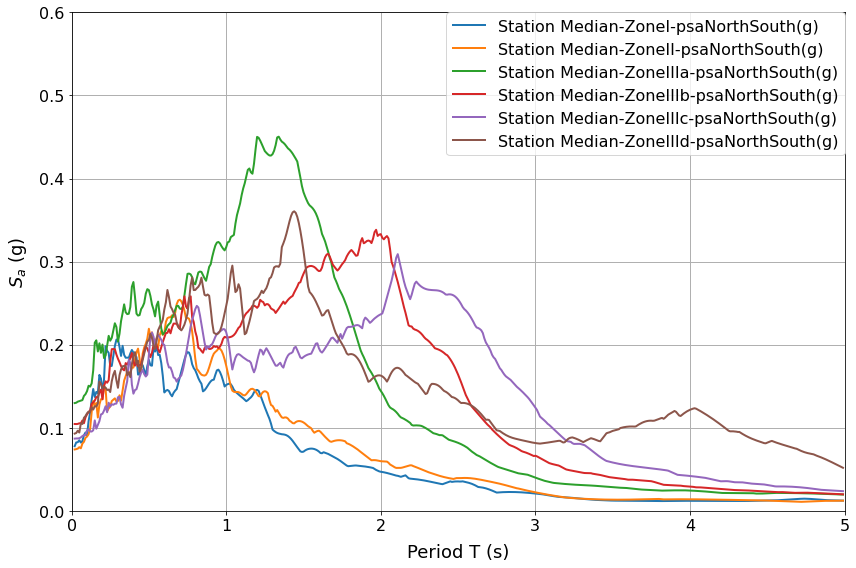

In [60]:
#fig, ax = plt.subplots()
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)

# Plot North-South component
for i in df_CIRES_allZones_Median_NorthSouth:
    ax.plot(df_CIRES_allZones_Median['Time(s)'], df_CIRES_allZones_Median[i], linewidth=2, label='Station %s' %i)

# Plot East-West component
#for i in df_CIRES_allZones_Median_EastWest: 
#    ax.plot(df_CIRES_allZones_Median['Time(s)'], df_CIRES_allZones_Median[i], linewidth=2, label='Station %s' %i)

# Add line for period and spectral acceleration
x_x=[1.512,1.512]
y_y=[0.0,0.24]

x_x2=[0,1.512]
y_y2=[0.240,0.240]

#ax.plot(x_x, y_y, lw=4, c='green')
#ax.plot(x_x2, y_y2, lw=4, c='green')

# Set axes limits
ax.set_xlim(0,5)
ax.set_ylim(0,0.6)

# Tick parameters
ax.tick_params(axis="x", labelsize=16)
ax.tick_params(axis="y", labelsize=16)

# Axes titles
ax.set_xlabel('Period T (s)', fontsize = 18, labelpad=10)
ax.set_ylabel('$S_a$ (g)', fontsize = 18, labelpad=10)

# Grid lines
ax.grid(linewidth=1)

# Legend
ax.legend(loc=0, borderaxespad=0., prop={'size': 16})

plt.tight_layout()

# Export figure
fig.savefig("/homevol/sroe459/git_projects/2017-Puebla-Mexico-earthquake/Figures/spectrum_Median-NorthSouth.png", dpi=200)

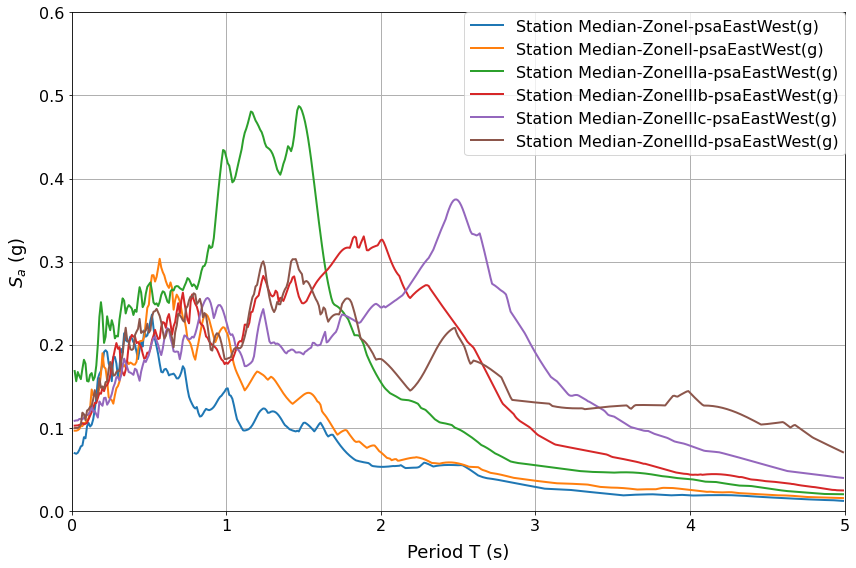

In [61]:
#fig, ax = plt.subplots()
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)

# Plot North-South component
#for i in df_CIRES_allZones_Median_NorthSouth:
#    ax.plot(df_CIRES_allZones_Median['Time(s)'], df_CIRES_allZones_Median[i], linewidth=2, label='Station %s' %i)

# Plot East-West component
for i in df_CIRES_allZones_Median_EastWest: 
    ax.plot(df_CIRES_allZones_Median['Time(s)'], df_CIRES_allZones_Median[i], linewidth=2, label='Station %s' %i)

# Add line for period and spectral acceleration
x_x=[1.512,1.512]
y_y=[0.0,0.24]

x_x2=[0,1.512]
y_y2=[0.240,0.240]

#ax.plot(x_x, y_y, lw=4, c='green')
#ax.plot(x_x2, y_y2, lw=4, c='green')

# Set axes limits
ax.set_xlim(0,5)
ax.set_ylim(0,0.6)

# Tick parameters
ax.tick_params(axis="x", labelsize=16)
ax.tick_params(axis="y", labelsize=16)

# Axes titles
ax.set_xlabel('Period T (s)', fontsize = 18, labelpad=10)
ax.set_ylabel('$S_a$ (g)', fontsize = 18, labelpad=10)

# Grid lines
ax.grid(linewidth=1)

# Legend
ax.legend(loc=0, borderaxespad=0., prop={'size': 16})

plt.tight_layout()

# Export figure
fig.savefig("/homevol/sroe459/git_projects/2017-Puebla-Mexico-earthquake/Figures/spectrum_Median-EastWest.png", dpi=200)

## For an individual station

In [12]:
df_CIRES_ZoneIIIb.columns

Index(['Time(s)', 'AL01-EQ2-psaNorthSouth(g)', 'AL01-EQ2-psaEastWest(g)',
       'BL45-EQ8-psaNorthSouth(g)', 'BL45-EQ8-psaEastWest(g)',
       'CI05-EQ15-psaNorthSouth(g)', 'CI05-EQ15-psaEastWest(g)',
       'CJ03-EQ16-psaNorthSouth(g)', 'CJ03-EQ16-psaEastWest(g)',
       'CJ04-EQ17-psaNorthSouth(g)', 'CJ04-EQ17-psaEastWest(g)',
       'CO56-EQ19-psaNorthSouth(g)', 'CO56-EQ19-psaEastWest(g)',
       'GA62-EQ29-psaNorthSouth(g)', 'GA62-EQ29-psaEastWest(g)',
       'GC38-EQ30-psaNorthSouth(g)', 'GC38-EQ30-psaEastWest(g)',
       'LI58-EQ37-psaNorthSouth(g)', 'LI58-EQ37-psaEastWest(g)',
       'PE10-EQ47-psaNorthSouth(g)', 'PE10-EQ47-psaEastWest(g)',
       'RM48-EQ49-psaNorthSouth(g)', 'RM48-EQ49-psaEastWest(g)',
       'SP51-EQ51-psaNorthSouth(g)', 'SP51-EQ51-psaEastWest(g)',
       'TL08-EQ53-psaNorthSouth(g)', 'TL08-EQ53-psaEastWest(g)',
       'TL55-EQ54-psaNorthSouth(g)', 'TL55-EQ54-psaEastWest(g)',
       'VG09-EQ58-psaNorthSouth(g)', 'VG09-EQ58-psaEastWest(g)',
       'Median-Zon

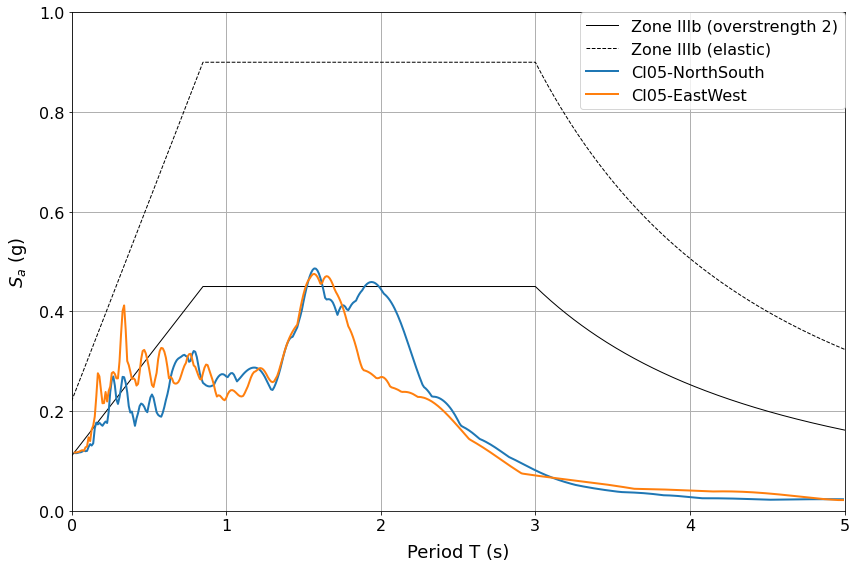

In [13]:
#fig, ax = plt.subplots()
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)

# Plot Design Response Spectrum
ax.plot(df_design_RS['T(s)'], df_design_RS['Zone IIIb (overstrength 2)'], linewidth=1, c='black', label='Zone IIIb (overstrength 2)')

# Plot Design Response Spectrum
ax.plot(df_design_RS['T(s)'], df_design_RS['Zone IIIb (elastic)'], linewidth=1, c='black', linestyle='--', label='Zone IIIb (elastic)')

# Plot North-South component
ax.plot(df_CIRES_ZoneIIIb['Time(s)'], df_CIRES_ZoneIIIb['CI05-EQ15-psaNorthSouth(g)'], linewidth=2, label='CI05-NorthSouth')

# Plot East-West component
ax.plot(df_CIRES_ZoneIIIb['Time(s)'], df_CIRES_ZoneIIIb['CI05-EQ15-psaEastWest(g)'], linewidth=2, label='CI05-EastWest')

# Add line for period and spectral acceleration
x_x=[1.512,1.512]
y_y=[0.0,0.24]

x_x2=[0,1.512]
y_y2=[0.240,0.240]

#ax.plot(x_x, y_y, lw=4, c='green')
#ax.plot(x_x2, y_y2, lw=4, c='green')

# Set axes limits
ax.set_xlim(0,5)
ax.set_ylim(0,1.0)

# Tick parameters
ax.tick_params(axis="x", labelsize=16)
ax.tick_params(axis="y", labelsize=16)

# Axes titles
ax.set_xlabel('Period T (s)', fontsize = 18, labelpad=10)
ax.set_ylabel('$S_a$ (g)', fontsize = 18, labelpad=10)

# Grid lines
ax.grid(linewidth=1)

# Legend
ax.legend(loc=1, borderaxespad=0., prop={'size': 16})

plt.tight_layout()

# Export figure
fig.savefig("/homevol/sroe459/git_projects/2017-Puebla-Mexico-earthquake/Figures/spectrum_CI05.png", dpi=200)

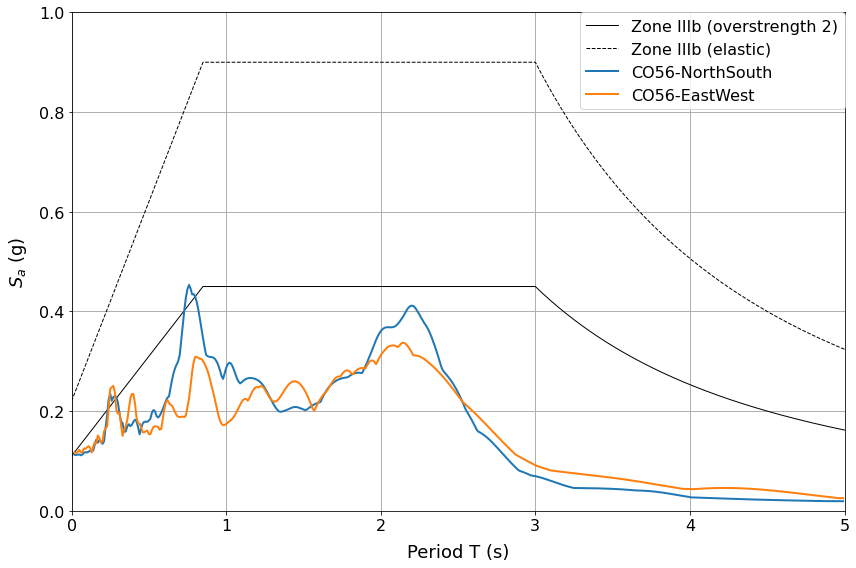

In [14]:
#fig, ax = plt.subplots()
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)

# Plot Design Response Spectrum
ax.plot(df_design_RS['T(s)'], df_design_RS['Zone IIIb (overstrength 2)'], linewidth=1, c='black', label='Zone IIIb (overstrength 2)')

# Plot Design Response Spectrum
ax.plot(df_design_RS['T(s)'], df_design_RS['Zone IIIb (elastic)'], linewidth=1, c='black', linestyle='--', label='Zone IIIb (elastic)')

# Plot North-South component
ax.plot(df_CIRES_ZoneIIIb['Time(s)'], df_CIRES_ZoneIIIb['CO56-EQ19-psaNorthSouth(g)'], linewidth=2, label='CO56-NorthSouth')

# Plot East-West component
ax.plot(df_CIRES_ZoneIIIb['Time(s)'], df_CIRES_ZoneIIIb['CO56-EQ19-psaEastWest(g)'], linewidth=2, label='CO56-EastWest')

# Add line for period and spectral acceleration
x_x=[1.512,1.512]
y_y=[0.0,0.24]

x_x2=[0,1.512]
y_y2=[0.240,0.240]

#ax.plot(x_x, y_y, lw=4, c='green')
#ax.plot(x_x2, y_y2, lw=4, c='green')

# Set axes limits
ax.set_xlim(0,5)
ax.set_ylim(0,1.0)

# Tick parameters
ax.tick_params(axis="x", labelsize=16)
ax.tick_params(axis="y", labelsize=16)

# Axes titles
ax.set_xlabel('Period T (s)', fontsize = 18, labelpad=10)
ax.set_ylabel('$S_a$ (g)', fontsize = 18, labelpad=10)

# Grid lines
ax.grid(linewidth=1)

# Legend
ax.legend(loc=1, borderaxespad=0., prop={'size': 16})

#box = ax.get_position()
#ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 14})

plt.tight_layout()

# Export figure
fig.savefig("/homevol/sroe459/git_projects/2017-Puebla-Mexico-earthquake/Figures/spectrum_CO56.png", dpi=200)

In [65]:
df_CIRES_ZoneIIIa.columns

Index(['Time(s)', 'AO24-EQ3-psaNorthSouth(g)', 'AO24-EQ3-psaEastWest(g)',
       'CH84-EQ14-psaNorthSouth(g)', 'CH84-EQ14-psaEastWest(g)',
       'ES57-EQ27-psaNorthSouth(g)', 'ES57-EQ27-psaEastWest(g)',
       'IB22-EQ33-psaNorthSouth(g)', 'IB22-EQ33-psaEastWest(g)',
       'JC54-EQ35-psaNorthSouth(g)', 'JC54-EQ35-psaEastWest(g)',
       'LI33-EQ36-psaNorthSouth(g)', 'LI33-EQ36-psaEastWest(g)',
       'LV17-EQ38-psaNorthSouth(g)', 'LV17-EQ38-psaEastWest(g)',
       'MI15-EQ40-psaNorthSouth(g)', 'MI15-EQ40-psaEastWest(g)',
       'SI53-EQ50-psaNorthSouth(g)', 'SI53-EQ50-psaEastWest(g)',
       'UC44-EQ56-psaNorthSouth(g)', 'UC44-EQ56-psaEastWest(g)',
       'Median-ZoneIIIa-psaNorthSouth(g)',
       'StandardDev-ZoneIIIa-psaNorthSouth(g)',
       'Median-ZoneIIIa-psaEastWest(g)',
       'StandardDev-ZoneIIIa-psaEastWest(g)'],
      dtype='object')

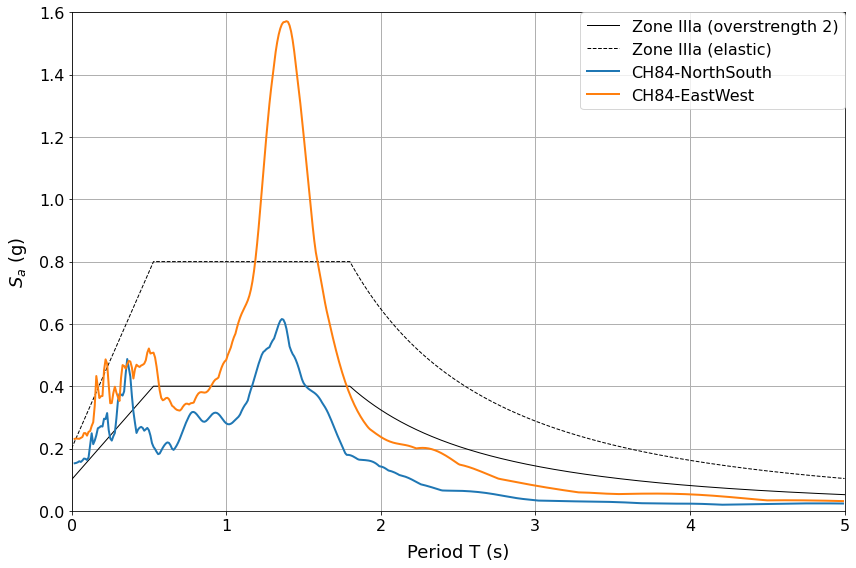

In [66]:
#fig, ax = plt.subplots()
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)

# Plot Design Response Spectrum
ax.plot(df_design_RS['T(s)'], df_design_RS['Zone IIIa (overstrength 2)'], linewidth=1, c='black', label='Zone IIIa (overstrength 2)')

# Plot Design Response Spectrum
ax.plot(df_design_RS['T(s)'], df_design_RS['Zone IIIa (elastic)'], linewidth=1, c='black', linestyle='--', label='Zone IIIa (elastic)')

# Plot North-South component
ax.plot(df_CIRES_ZoneIIIa['Time(s)'], df_CIRES_ZoneIIIa['CH84-EQ14-psaNorthSouth(g)'], linewidth=2, label='CH84-NorthSouth')

# Plot East-West component
ax.plot(df_CIRES_ZoneIIIa['Time(s)'], df_CIRES_ZoneIIIa['CH84-EQ14-psaEastWest(g)'], linewidth=2, label='CH84-EastWest')

# Add line for period and spectral acceleration
x_x=[1.512,1.512]
y_y=[0.0,0.24]

x_x2=[0,1.512]
y_y2=[0.240,0.240]

#ax.plot(x_x, y_y, lw=4, c='green')
#ax.plot(x_x2, y_y2, lw=4, c='green')

# Set axes limits
ax.set_xlim(0,5)
ax.set_ylim(0,1.6)

# Tick parameters
ax.tick_params(axis="x", labelsize=16)
ax.tick_params(axis="y", labelsize=16)

# Axes titles
ax.set_xlabel('Period T (s)', fontsize = 18, labelpad=10)
ax.set_ylabel('$S_a$ (g)', fontsize = 18, labelpad=10)

# Grid lines
ax.grid(linewidth=1)

# Legend
#box = ax.get_position()
#ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 14})

# Legend
ax.legend(loc=0, borderaxespad=0., prop={'size': 16})

plt.tight_layout()

# Export figure
fig.savefig("/homevol/sroe459/git_projects/2017-Puebla-Mexico-earthquake/Figures/spectrum_CH84.png", dpi=200)

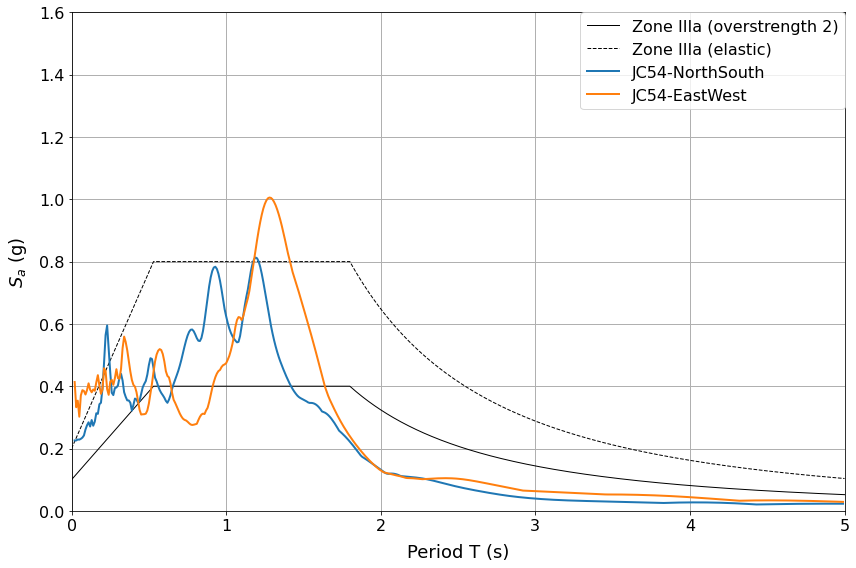

In [67]:
#fig, ax = plt.subplots()
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)

# Plot Design Response Spectrum
ax.plot(df_design_RS['T(s)'], df_design_RS['Zone IIIa (overstrength 2)'], linewidth=1, c='black', label='Zone IIIa (overstrength 2)')

# Plot Design Response Spectrum
ax.plot(df_design_RS['T(s)'], df_design_RS['Zone IIIa (elastic)'], linewidth=1, c='black', linestyle='--', label='Zone IIIa (elastic)')

# Plot North-South component
ax.plot(df_CIRES_ZoneIIIa['Time(s)'], df_CIRES_ZoneIIIa['JC54-EQ35-psaNorthSouth(g)'], linewidth=2, label='JC54-NorthSouth')

# Plot East-West component
ax.plot(df_CIRES_ZoneIIIa['Time(s)'], df_CIRES_ZoneIIIa['JC54-EQ35-psaEastWest(g)'], linewidth=2, label='JC54-EastWest')

# Add line for period and spectral acceleration
x_x=[1.512,1.512]
y_y=[0.0,0.24]

x_x2=[0,1.512]
y_y2=[0.240,0.240]

#ax.plot(x_x, y_y, lw=4, c='green')
#ax.plot(x_x2, y_y2, lw=4, c='green')

# Set axes limits
ax.set_xlim(0,5)
ax.set_ylim(0,1.6)

# Tick parameters
ax.tick_params(axis="x", labelsize=16)
ax.tick_params(axis="y", labelsize=16)

# Axes titles
ax.set_xlabel('Period T (s)', fontsize = 18, labelpad=10)
ax.set_ylabel('$S_a$ (g)', fontsize = 18, labelpad=10)

# Grid lines
ax.grid(linewidth=1)

# Legend
#box = ax.get_position()
#ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 14})

# Legend
ax.legend(loc=0, borderaxespad=0., prop={'size': 16})

plt.tight_layout()

# Export figure
fig.savefig("/homevol/sroe459/git_projects/2017-Puebla-Mexico-earthquake/Figures/spectrum_JC54.png", dpi=200)

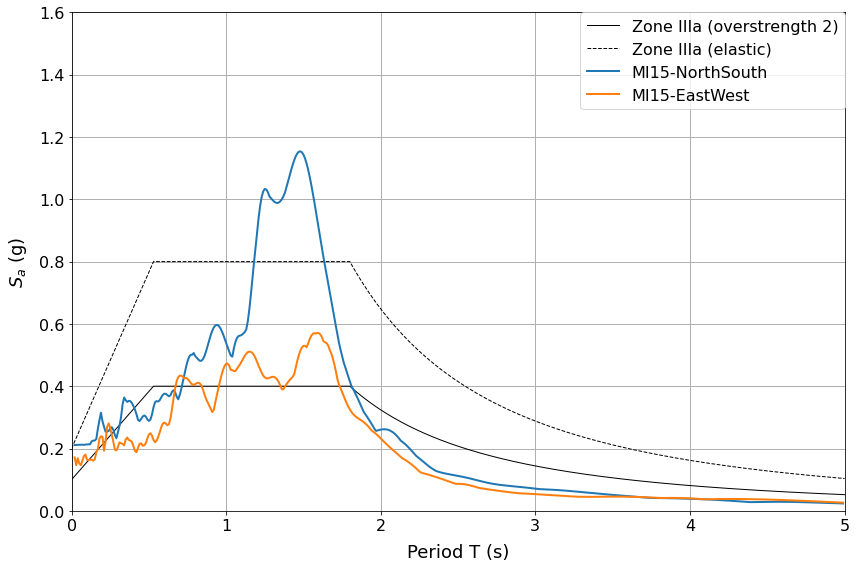

In [68]:
#fig, ax = plt.subplots()
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)

# Plot Design Response Spectrum
ax.plot(df_design_RS['T(s)'], df_design_RS['Zone IIIa (overstrength 2)'], linewidth=1, c='black', label='Zone IIIa (overstrength 2)')

# Plot Design Response Spectrum
ax.plot(df_design_RS['T(s)'], df_design_RS['Zone IIIa (elastic)'], linewidth=1, c='black', linestyle='--', label='Zone IIIa (elastic)')

# Plot North-South component
ax.plot(df_CIRES_ZoneIIIa['Time(s)'], df_CIRES_ZoneIIIa['MI15-EQ40-psaNorthSouth(g)'], linewidth=2, label='MI15-NorthSouth')

# Plot East-West component
ax.plot(df_CIRES_ZoneIIIa['Time(s)'], df_CIRES_ZoneIIIa['MI15-EQ40-psaEastWest(g)'], linewidth=2, label='MI15-EastWest')

# Add line for period and spectral acceleration
x_x=[1.512,1.512]
y_y=[0.0,0.24]

x_x2=[0,1.512]
y_y2=[0.240,0.240]

#ax.plot(x_x, y_y, lw=4, c='green')
#ax.plot(x_x2, y_y2, lw=4, c='green')

# Set axes limits
ax.set_xlim(0,5)
ax.set_ylim(0,1.6)

# Tick parameters
ax.tick_params(axis="x", labelsize=16)
ax.tick_params(axis="y", labelsize=16)

# Axes titles
ax.set_xlabel('Period T (s)', fontsize = 18, labelpad=10)
ax.set_ylabel('$S_a$ (g)', fontsize = 18, labelpad=10)

# Grid lines
ax.grid(linewidth=1)

# Legend
#box = ax.get_position()
#ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 14})

# Legend
ax.legend(loc=0, borderaxespad=0., prop={'size': 16})


plt.tight_layout()

# Export figure
fig.savefig("/homevol/sroe459/git_projects/2017-Puebla-Mexico-earthquake/Figures/spectrum_MI15.png", dpi=200)

## Without design response spectrum (for map)

In [38]:
df_CIRES_ZoneIIIa.columns

Index(['Time(s)', 'AO24-EQ3-psaNorthSouth(g)', 'AO24-EQ3-psaEastWest(g)',
       'CH84-EQ14-psaNorthSouth(g)', 'CH84-EQ14-psaEastWest(g)',
       'ES57-EQ27-psaNorthSouth(g)', 'ES57-EQ27-psaEastWest(g)',
       'IB22-EQ33-psaNorthSouth(g)', 'IB22-EQ33-psaEastWest(g)',
       'JC54-EQ35-psaNorthSouth(g)', 'JC54-EQ35-psaEastWest(g)',
       'LI33-EQ36-psaNorthSouth(g)', 'LI33-EQ36-psaEastWest(g)',
       'LV17-EQ38-psaNorthSouth(g)', 'LV17-EQ38-psaEastWest(g)',
       'MI15-EQ40-psaNorthSouth(g)', 'MI15-EQ40-psaEastWest(g)',
       'SI53-EQ50-psaNorthSouth(g)', 'SI53-EQ50-psaEastWest(g)',
       'UC44-EQ56-psaNorthSouth(g)', 'UC44-EQ56-psaEastWest(g)',
       'Median-ZoneIIIa-psaNorthSouth(g)',
       'StandardDev-ZoneIIIa-psaNorthSouth(g)',
       'Median-ZoneIIIa-psaEastWest(g)',
       'StandardDev-ZoneIIIa-psaEastWest(g)'],
      dtype='object')

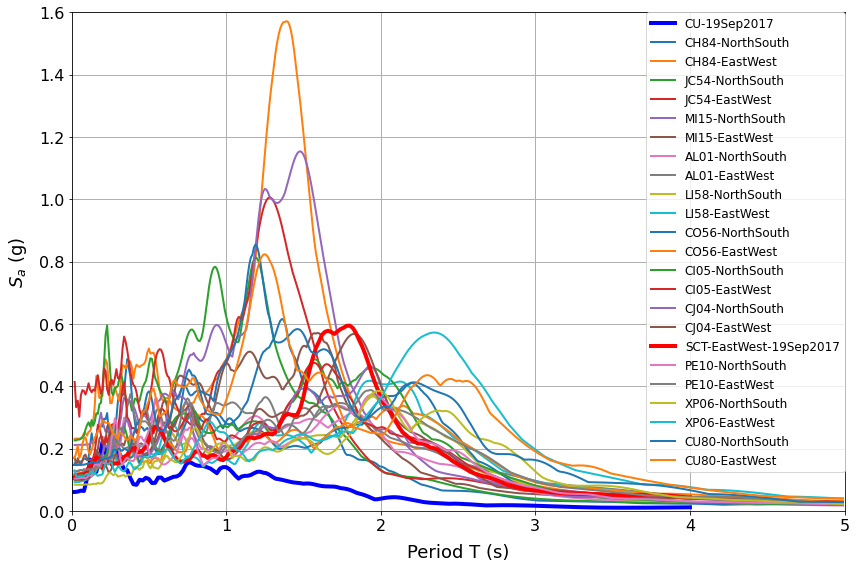

In [16]:
#fig, ax = plt.subplots()
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)

# Plot CU 2017
ax.plot(df_CU['T(s)'], df_CU['CU 19 Sep 2017 5% Sa(g)'], linewidth=4, c='blue', label='CU-19Sep2017')


# Plot CH84 North-South component
ax.plot(df_CIRES_ZoneIIIa['Time(s)'], df_CIRES_ZoneIIIa['CH84-EQ14-psaNorthSouth(g)'], linewidth=2, label='CH84-NorthSouth')
# Plot CH84 East-West component
ax.plot(df_CIRES_ZoneIIIa['Time(s)'], df_CIRES_ZoneIIIa['CH84-EQ14-psaEastWest(g)'], linewidth=2, label='CH84-EastWest')

# Plot JC54 North-South component
ax.plot(df_CIRES_ZoneIIIa['Time(s)'], df_CIRES_ZoneIIIa['JC54-EQ35-psaNorthSouth(g)'], linewidth=2, label='JC54-NorthSouth')
# Plot JC54 East-West component
ax.plot(df_CIRES_ZoneIIIa['Time(s)'], df_CIRES_ZoneIIIa['JC54-EQ35-psaEastWest(g)'], linewidth=2, label='JC54-EastWest')

# Plot MI15 North-South component
ax.plot(df_CIRES_ZoneIIIa['Time(s)'], df_CIRES_ZoneIIIa['MI15-EQ40-psaNorthSouth(g)'], linewidth=2, label='MI15-NorthSouth')
# Plot MI15 East-West component
ax.plot(df_CIRES_ZoneIIIa['Time(s)'], df_CIRES_ZoneIIIa['MI15-EQ40-psaEastWest(g)'], linewidth=2, label='MI15-EastWest')


# Plot AL01 North-South component
ax.plot(df_CIRES_ZoneIIIb['Time(s)'], df_CIRES_ZoneIIIb['AL01-EQ2-psaNorthSouth(g)'], linewidth=2, label='AL01-NorthSouth')
# Plot AL01 East-West component
ax.plot(df_CIRES_ZoneIIIb['Time(s)'], df_CIRES_ZoneIIIb['AL01-EQ2-psaEastWest(g)'], linewidth=2, label='AL01-EastWest')

# Plot LI58 North-South component
ax.plot(df_CIRES_ZoneIIIb['Time(s)'], df_CIRES_ZoneIIIb['LI58-EQ37-psaNorthSouth(g)'], linewidth=2, label='LI58-NorthSouth')
# Plot LI58 East-West component
ax.plot(df_CIRES_ZoneIIIb['Time(s)'], df_CIRES_ZoneIIIb['LI58-EQ37-psaEastWest(g)'], linewidth=2, label='LI58-EastWest')

# Plot CO56 North-South component
ax.plot(df_CIRES_ZoneIIIb['Time(s)'], df_CIRES_ZoneIIIb['CO56-EQ19-psaNorthSouth(g)'], linewidth=2, label='CO56-NorthSouth')
# Plot CO56 East-West component
ax.plot(df_CIRES_ZoneIIIb['Time(s)'], df_CIRES_ZoneIIIb['CO56-EQ19-psaEastWest(g)'], linewidth=2, label='CO56-EastWest')

# Plot CI05 North-South component
ax.plot(df_CIRES_ZoneIIIb['Time(s)'], df_CIRES_ZoneIIIb['CI05-EQ15-psaNorthSouth(g)'], linewidth=2, label='CI05-NorthSouth')
# Plot CI05 East-West component
ax.plot(df_CIRES_ZoneIIIb['Time(s)'], df_CIRES_ZoneIIIb['CI05-EQ15-psaEastWest(g)'], linewidth=2, label='CI05-EastWest')

# Plot CJ04 North-South component
ax.plot(df_CIRES_ZoneIIIb['Time(s)'], df_CIRES_ZoneIIIb['CJ04-EQ17-psaNorthSouth(g)'], linewidth=2, label='CJ04-NorthSouth')
# Plot CJ04 East-West component
ax.plot(df_CIRES_ZoneIIIb['Time(s)'], df_CIRES_ZoneIIIb['CJ04-EQ17-psaEastWest(g)'], linewidth=2, label='CJ04-EastWest')

# Plot SCT 2017
ax.plot(df_STC['T(s)'], df_STC['SCT-EastWest-19Sep2017-Damping5percent-Sa(g)'], linewidth=4, c='red', label='SCT-EastWest-19Sep2017')

# Plot PE10 North-South component
ax.plot(df_CIRES_ZoneIIIb['Time(s)'], df_CIRES_ZoneIIIb['PE10-EQ47-psaNorthSouth(g)'], linewidth=2, label='PE10-NorthSouth')
# Plot PE10 East-West component
ax.plot(df_CIRES_ZoneIIIb['Time(s)'], df_CIRES_ZoneIIIb['PE10-EQ47-psaEastWest(g)'], linewidth=2, label='PE10-EastWest')


# Plot XP06 North-South component
ax.plot(df_CIRES_ZoneIIIc['Time(s)'], df_CIRES_ZoneIIIc['XP06-EQ61-psaNorthSouth(g)'], linewidth=2, label='XP06-NorthSouth')
# Plot XP06 East-West component
ax.plot(df_CIRES_ZoneIIIc['Time(s)'], df_CIRES_ZoneIIIc['XP06-EQ61-psaEastWest(g)'], linewidth=2, label='XP06-EastWest')

# Plot CU80 North-South component
ax.plot(df_CIRES_ZoneIIIc['Time(s)'], df_CIRES_ZoneIIIc['CU80-EQ22-psaNorthSouth(g)'], linewidth=2, label='CU80-NorthSouth')
# Plot CU80 East-West component
ax.plot(df_CIRES_ZoneIIIc['Time(s)'], df_CIRES_ZoneIIIc['CU80-EQ22-psaEastWest(g)'], linewidth=2, label='CU80-EastWest')



# Add line for period and spectral accelaration
x_x=[1.512,1.512]
y_y=[0.0,0.24]

x_x2=[0,1.512]
y_y2=[0.240,0.240]

#ax.plot(x_x, y_y, lw=4, c='green')
#ax.plot(x_x2, y_y2, lw=4, c='green')

# Set axes limits
ax.set_xlim(0,5)
ax.set_ylim(0,1.6)

# Tick parameters
ax.tick_params(axis="x", labelsize=16)
ax.tick_params(axis="y", labelsize=16)

# Axes titles
ax.set_xlabel('Period T (s)', fontsize = 18, labelpad=10)
ax.set_ylabel('$S_a$ (g)', fontsize = 18, labelpad=10)

# Grid lines
ax.grid(linewidth=1)

# Legend
ax.legend(loc=1, borderaxespad=0., prop={'size': 12})

plt.tight_layout()

# Export figure
fig.savefig("/homevol/sroe459/git_projects/2017-Puebla-Mexico-earthquake/Figures/spectrum_station_overview_map_without_design_RS.png", dpi=200)

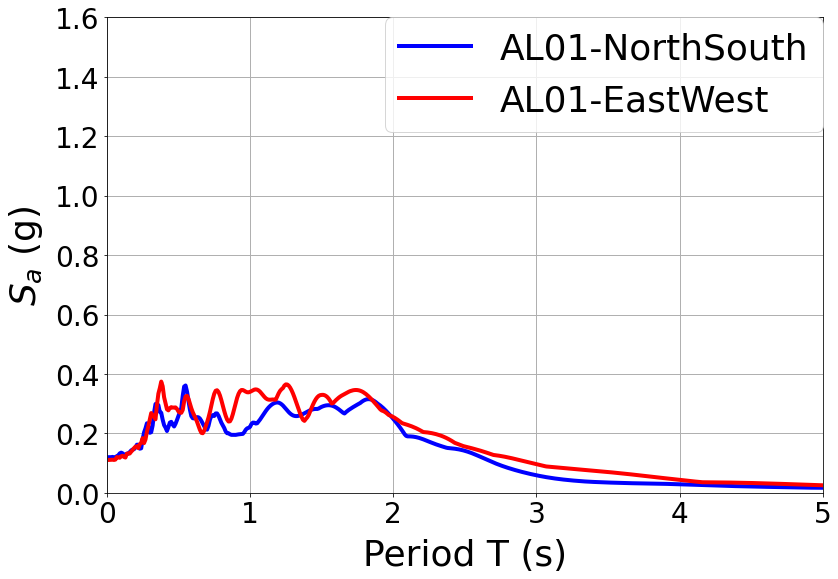

In [15]:
#fig, ax = plt.subplots()
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)

# Plot AL01 North-South component
ax.plot(df_CIRES_ZoneIIIb['Time(s)'], df_CIRES_ZoneIIIb['AL01-EQ2-psaNorthSouth(g)'], linewidth=4, c='blue', label='AL01-NorthSouth')
# Plot AL01 East-West component
ax.plot(df_CIRES_ZoneIIIb['Time(s)'], df_CIRES_ZoneIIIb['AL01-EQ2-psaEastWest(g)'], linewidth=4, c='red', label='AL01-EastWest')

# Add line for period and spectral accelaration
x_x=[1.512,1.512]
y_y=[0.0,0.24]

x_x2=[0,1.512]
y_y2=[0.240,0.240]

#ax.plot(x_x, y_y, lw=4, c='green')
#ax.plot(x_x2, y_y2, lw=4, c='green')

# Set axes limits
ax.set_xlim(0,5)
ax.set_ylim(0,1.6)

# Tick parameters
ax.tick_params(axis="x", labelsize=28)
ax.tick_params(axis="y", labelsize=28)

# Axes titles
ax.set_xlabel('Period T (s)', fontsize = 36, labelpad=10)
ax.set_ylabel('$S_a$ (g)', fontsize = 36, labelpad=10)

# Grid lines
ax.grid(linewidth=1)

# Legend
#box = ax.get_position()
#ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 14})

# Legend
ax.legend(loc=0, borderaxespad=0., prop={'size': 36})

plt.tight_layout()

# Export figure
fig.savefig("/homevol/sroe459/git_projects/2017-Puebla-Mexico-earthquake/Figures/spectrum_station_AL01_without_design_RS.png", dpi=200)

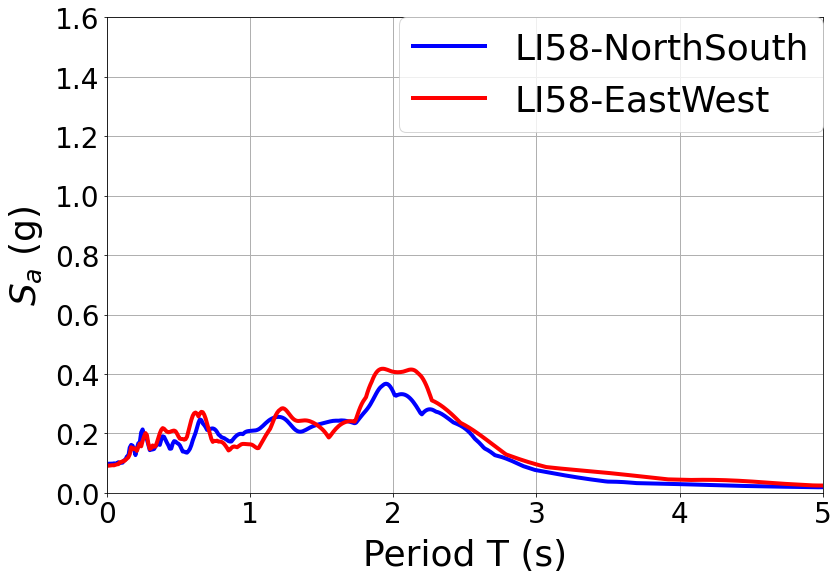

In [14]:
#fig, ax = plt.subplots()
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)

# Plot LI58 North-South component
ax.plot(df_CIRES_ZoneIIIb['Time(s)'], df_CIRES_ZoneIIIb['LI58-EQ37-psaNorthSouth(g)'], linewidth=4, c='blue', label='LI58-NorthSouth')
# Plot LI58 East-West component
ax.plot(df_CIRES_ZoneIIIb['Time(s)'], df_CIRES_ZoneIIIb['LI58-EQ37-psaEastWest(g)'], linewidth=4, c='red', label='LI58-EastWest')


# Add line for period and spectral accelaration
x_x=[1.512,1.512]
y_y=[0.0,0.24]

x_x2=[0,1.512]
y_y2=[0.240,0.240]

#ax.plot(x_x, y_y, lw=4, c='green')
#ax.plot(x_x2, y_y2, lw=4, c='green')

# Set axes limits
ax.set_xlim(0,5)
ax.set_ylim(0,1.6)

# Tick parameters
ax.tick_params(axis="x", labelsize=28)
ax.tick_params(axis="y", labelsize=28)

# Axes titles
ax.set_xlabel('Period T (s)', fontsize = 36, labelpad=10)
ax.set_ylabel('$S_a$ (g)', fontsize = 36, labelpad=10)

# Grid lines
ax.grid(linewidth=1)

# Legend
#box = ax.get_position()
#ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 14})

# Legend
ax.legend(loc=0, borderaxespad=0., prop={'size': 36})

plt.tight_layout()

# Export figure
fig.savefig("/homevol/sroe459/git_projects/2017-Puebla-Mexico-earthquake/Figures/spectrum_station_LI58_without_design_RS.png", dpi=200)

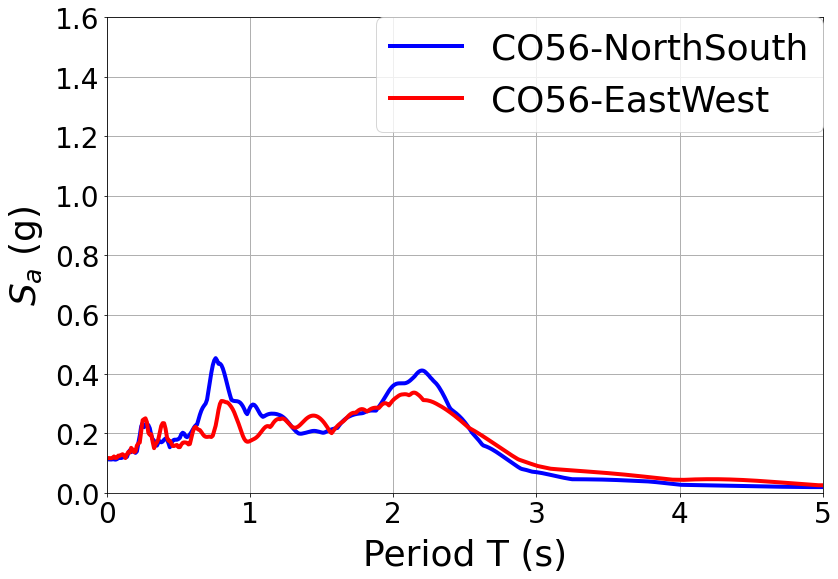

In [13]:
#fig, ax = plt.subplots()
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)

# Plot CO56 North-South component
ax.plot(df_CIRES_ZoneIIIb['Time(s)'], df_CIRES_ZoneIIIb['CO56-EQ19-psaNorthSouth(g)'], linewidth=4, c='blue', label='CO56-NorthSouth')
# Plot CO56 East-West component
ax.plot(df_CIRES_ZoneIIIb['Time(s)'], df_CIRES_ZoneIIIb['CO56-EQ19-psaEastWest(g)'], linewidth=4, c='red', label='CO56-EastWest')

# Add line for period and spectral accelaration
x_x=[1.512,1.512]
y_y=[0.0,0.24]

x_x2=[0,1.512]
y_y2=[0.240,0.240]

#ax.plot(x_x, y_y, lw=4, c='green')
#ax.plot(x_x2, y_y2, lw=4, c='green')

# Set axes limits
ax.set_xlim(0,5)
ax.set_ylim(0,1.6)

# Tick parameters
ax.tick_params(axis="x", labelsize=28)
ax.tick_params(axis="y", labelsize=28)

# Axes titles
ax.set_xlabel('Period T (s)', fontsize = 36, labelpad=10)
ax.set_ylabel('$S_a$ (g)', fontsize = 36, labelpad=10)

# Grid lines
ax.grid(linewidth=1)

# Legend
#box = ax.get_position()
#ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 14})

# Legend
ax.legend(loc=0, borderaxespad=0., prop={'size': 36})

plt.tight_layout()

# Export figure
fig.savefig("/homevol/sroe459/git_projects/2017-Puebla-Mexico-earthquake/Figures/spectrum_station_CO56_without_design_RS.png", dpi=200)

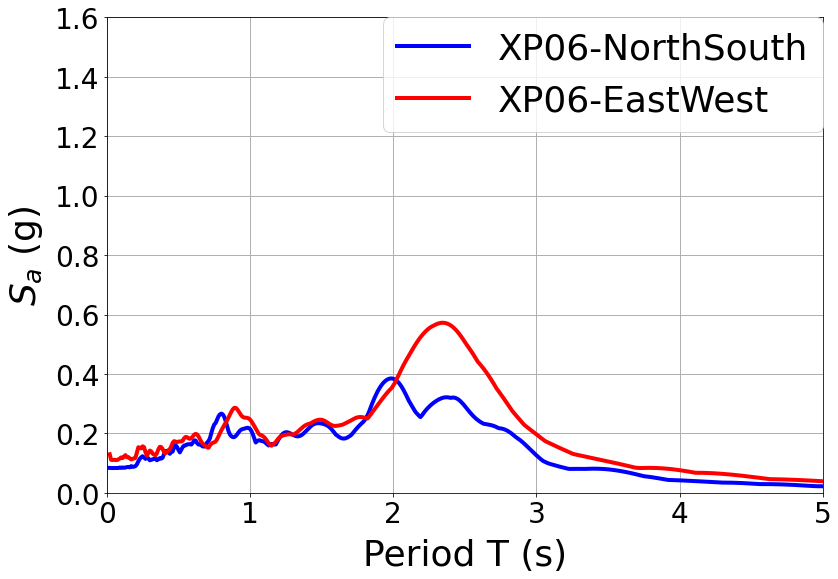

In [72]:
#fig, ax = plt.subplots()
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)

# Plot XP06 North-South component
ax.plot(df_CIRES_ZoneIIIc['Time(s)'], df_CIRES_ZoneIIIc['XP06-EQ61-psaNorthSouth(g)'], linewidth=4, c='blue', label='XP06-NorthSouth')
# Plot XP06 East-West component
ax.plot(df_CIRES_ZoneIIIc['Time(s)'], df_CIRES_ZoneIIIc['XP06-EQ61-psaEastWest(g)'], linewidth=4, c='red', label='XP06-EastWest')


# Add line for period and spectral acceleration
x_x=[1.512,1.512]
y_y=[0.0,0.24]

x_x2=[0,1.512]
y_y2=[0.240,0.240]

#ax.plot(x_x, y_y, lw=4, c='green')
#ax.plot(x_x2, y_y2, lw=4, c='green')

# Set axes limits
ax.set_xlim(0,5)
ax.set_ylim(0,1.6)

# Tick parameters
ax.tick_params(axis="x", labelsize=28)
ax.tick_params(axis="y", labelsize=28)

# Axes titles
ax.set_xlabel('Period T (s)', fontsize = 36, labelpad=10)
ax.set_ylabel('$S_a$ (g)', fontsize = 36, labelpad=10)

# Grid lines
ax.grid(linewidth=1)

# Legend
#box = ax.get_position()
#ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 14})

# Legend
ax.legend(loc=0, borderaxespad=0., prop={'size': 36})


plt.tight_layout()

# Export figure
fig.savefig("/homevol/sroe459/git_projects/2017-Puebla-Mexico-earthquake/Figures/spectrum_XP06_without_design_RS.png", dpi=200)

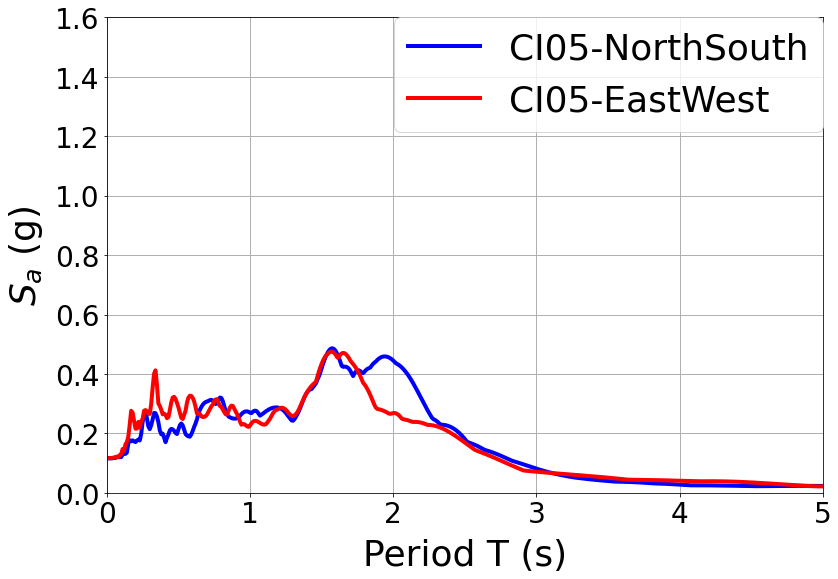

In [71]:
#fig, ax = plt.subplots()
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)

# Plot CI05 North-South component
ax.plot(df_CIRES_ZoneIIIb['Time(s)'], df_CIRES_ZoneIIIb['CI05-EQ15-psaNorthSouth(g)'], linewidth=4, c='blue', label='CI05-NorthSouth')
# Plot CI05 East-West component
ax.plot(df_CIRES_ZoneIIIb['Time(s)'], df_CIRES_ZoneIIIb['CI05-EQ15-psaEastWest(g)'], linewidth=4, c='red', label='CI05-EastWest')


# Add line for period and spectral acceleration
x_x=[1.512,1.512]
y_y=[0.0,0.24]

x_x2=[0,1.512]
y_y2=[0.240,0.240]

#ax.plot(x_x, y_y, lw=4, c='green')
#ax.plot(x_x2, y_y2, lw=4, c='green')

# Set axes limits
ax.set_xlim(0,5)
ax.set_ylim(0,1.6)

# Tick parameters
ax.tick_params(axis="x", labelsize=28)
ax.tick_params(axis="y", labelsize=28)

# Axes titles
ax.set_xlabel('Period T (s)', fontsize = 36, labelpad=10)
ax.set_ylabel('$S_a$ (g)', fontsize = 36, labelpad=10)

# Grid lines
ax.grid(linewidth=1)

# Legend
#box = ax.get_position()
#ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 14})

# Legend
ax.legend(loc=0, borderaxespad=0., prop={'size': 36})


plt.tight_layout()

# Export figure
fig.savefig("/homevol/sroe459/git_projects/2017-Puebla-Mexico-earthquake/Figures/spectrum_CI05_without_design_RS.png", dpi=200)

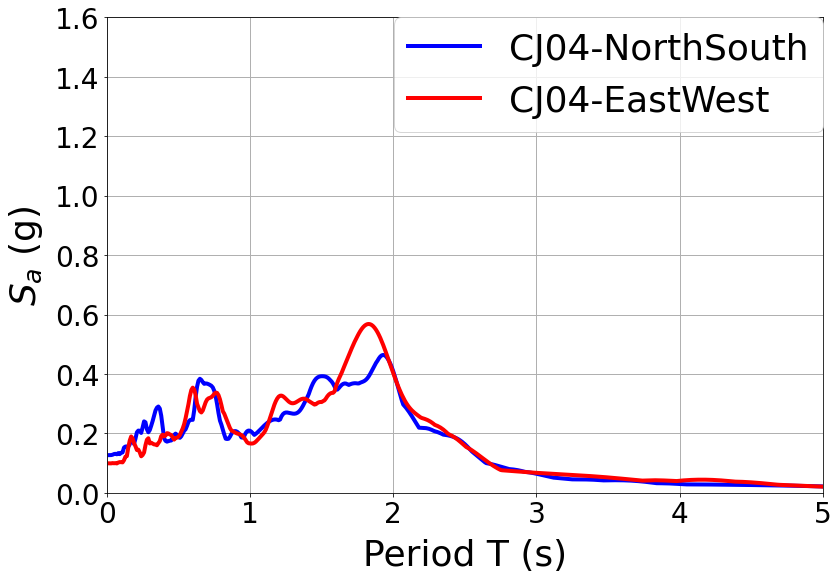

In [30]:
#fig, ax = plt.subplots()
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)

# Plot CJ04 North-South component
ax.plot(df_CIRES_ZoneIIIb['Time(s)'], df_CIRES_ZoneIIIb['CJ04-EQ17-psaNorthSouth(g)'], linewidth=4, c='blue', label='CJ04-NorthSouth')
# Plot CJ04 East-West component
ax.plot(df_CIRES_ZoneIIIb['Time(s)'], df_CIRES_ZoneIIIb['CJ04-EQ17-psaEastWest(g)'], linewidth=4, c='red', label='CJ04-EastWest')

# Add line for period and spectral accelaration
x_x=[1.512,1.512]
y_y=[0.0,0.24]

x_x2=[0,1.512]
y_y2=[0.240,0.240]

#ax.plot(x_x, y_y, lw=4, c='green')
#ax.plot(x_x2, y_y2, lw=4, c='green')

# Set axes limits
ax.set_xlim(0,5)
ax.set_ylim(0,1.6)

# Tick parameters
ax.tick_params(axis="x", labelsize=28)
ax.tick_params(axis="y", labelsize=28)

# Axes titles
ax.set_xlabel('Period T (s)', fontsize = 36, labelpad=10)
ax.set_ylabel('$S_a$ (g)', fontsize = 36, labelpad=10)

# Grid lines
ax.grid(linewidth=1)

# Legend
#box = ax.get_position()
#ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 14})

# Legend
ax.legend(loc=0, borderaxespad=0., prop={'size': 36})

plt.tight_layout()

# Export figure
fig.savefig("/homevol/sroe459/git_projects/2017-Puebla-Mexico-earthquake/Figures/spectrum_station_CJ04_without_design_RS.png", dpi=200)

In [17]:
df_SCT_CU.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   T(s)            251 non-null    float64
 1   SCT-EastWest    251 non-null    float64
 2   SCT-NorthSouth  251 non-null    float64
 3   CU-EastWest     251 non-null    float64
 4   CU-NorthSouth   251 non-null    float64
dtypes: float64(5)
memory usage: 9.9 KB


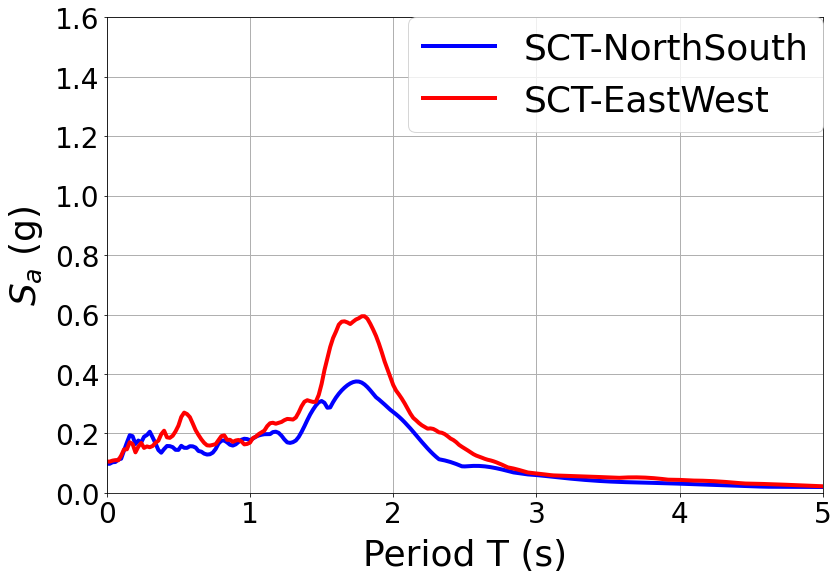

In [20]:
#fig, ax = plt.subplots()
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)

# Plot SCT North-South component
ax.plot(df_SCT_CU['T(s)'], df_SCT_CU['SCT-NorthSouth'], linewidth=4, c='blue', label='SCT-NorthSouth')

# Plot SCT East-West component
ax.plot(df_SCT_CU['T(s)'], df_SCT_CU['SCT-EastWest'], linewidth=4, c='red', label='SCT-EastWest')

# Add line for period and spectral accelaration
x_x=[1.512,1.512]
y_y=[0.0,0.24]

x_x2=[0,1.512]
y_y2=[0.240,0.240]

#ax.plot(x_x, y_y, lw=4, c='green')
#ax.plot(x_x2, y_y2, lw=4, c='green')

# Set axes limits
ax.set_xlim(0,5)
ax.set_ylim(0,1.6)

# Tick parameters
ax.tick_params(axis="x", labelsize=28)
ax.tick_params(axis="y", labelsize=28)

# Axes titles
ax.set_xlabel('Period T (s)', fontsize = 36, labelpad=10)
ax.set_ylabel('$S_a$ (g)', fontsize = 36, labelpad=10)

# Grid lines
ax.grid(linewidth=1)

# Legend
#box = ax.get_position()
#ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 14})

# Legend
ax.legend(loc=0, borderaxespad=0., prop={'size': 36})

plt.tight_layout()

# Export figure
fig.savefig("/homevol/sroe459/git_projects/2017-Puebla-Mexico-earthquake/Figures/spectrum_station_SCT_without_design_RS.png", dpi=200)

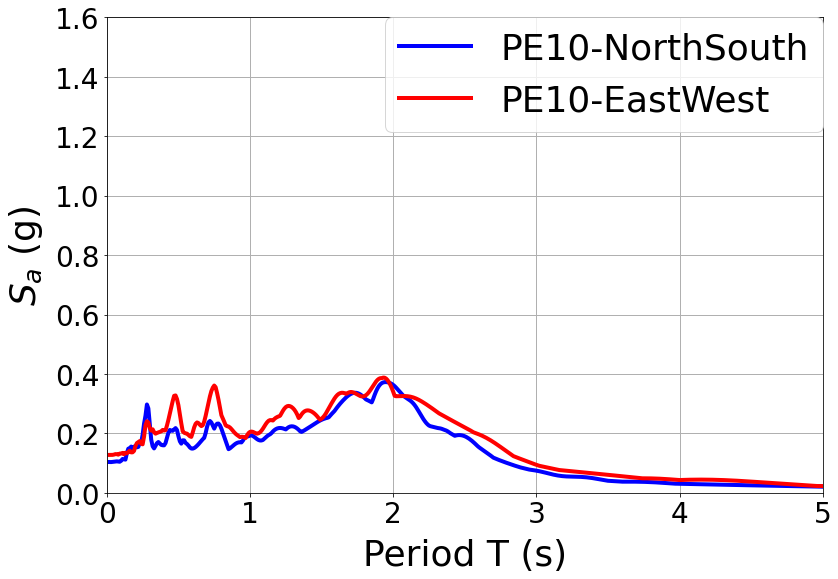

In [21]:
#fig, ax = plt.subplots()
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)

# Plot PE10 North-South component
ax.plot(df_CIRES_ZoneIIIb['Time(s)'], df_CIRES_ZoneIIIb['PE10-EQ47-psaNorthSouth(g)'], linewidth=4, c='blue', label='PE10-NorthSouth')
# Plot PE10 East-West component
ax.plot(df_CIRES_ZoneIIIb['Time(s)'], df_CIRES_ZoneIIIb['PE10-EQ47-psaEastWest(g)'], linewidth=4, c='red', label='PE10-EastWest')


# Add line for period and spectral acceleration
x_x=[1.512,1.512]
y_y=[0.0,0.24]

x_x2=[0,1.512]
y_y2=[0.240,0.240]

#ax.plot(x_x, y_y, lw=4, c='green')
#ax.plot(x_x2, y_y2, lw=4, c='green')

# Set axes limits
ax.set_xlim(0,5)
ax.set_ylim(0,1.6)

# Tick parameters
ax.tick_params(axis="x", labelsize=28)
ax.tick_params(axis="y", labelsize=28)

# Axes titles
ax.set_xlabel('Period T (s)', fontsize = 36, labelpad=10)
ax.set_ylabel('$S_a$ (g)', fontsize = 36, labelpad=10)

# Grid lines
ax.grid(linewidth=1)

# Legend
#box = ax.get_position()
#ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 14})

# Legend
ax.legend(loc=0, borderaxespad=0., prop={'size': 36})


plt.tight_layout()

# Export figure
fig.savefig("/homevol/sroe459/git_projects/2017-Puebla-Mexico-earthquake/Figures/spectrum_PE10_without_design_RS.png", dpi=200)

In [22]:
df_SCT_CU.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   T(s)            251 non-null    float64
 1   SCT-EastWest    251 non-null    float64
 2   SCT-NorthSouth  251 non-null    float64
 3   CU-EastWest     251 non-null    float64
 4   CU-NorthSouth   251 non-null    float64
dtypes: float64(5)
memory usage: 9.9 KB


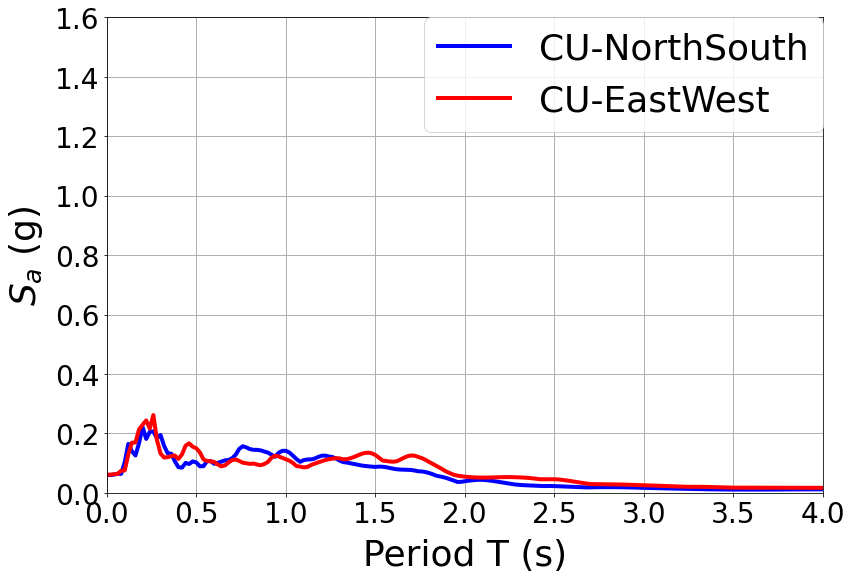

In [23]:
#fig, ax = plt.subplots()
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)

# Plot CU North-South component
ax.plot(df_SCT_CU['T(s)'], df_SCT_CU['CU-NorthSouth'], linewidth=4, c='blue', label='CU-NorthSouth')

# Plot CU East-West component
ax.plot(df_SCT_CU['T(s)'], df_SCT_CU['CU-EastWest'], linewidth=4, c='red', label='CU-EastWest')


# Add line for period and spectral accelaration
x_x=[1.512,1.512]
y_y=[0.0,0.24]

x_x2=[0,1.512]
y_y2=[0.240,0.240]

#ax.plot(x_x, y_y, lw=4, c='green')
#ax.plot(x_x2, y_y2, lw=4, c='green')

# Set axes limits
ax.set_xlim(0,4)
ax.set_ylim(0,1.6)

# Tick parameters
ax.tick_params(axis="x", labelsize=28)
ax.tick_params(axis="y", labelsize=28)

# Axes titles
ax.set_xlabel('Period T (s)', fontsize = 36, labelpad=10)
ax.set_ylabel('$S_a$ (g)', fontsize = 36, labelpad=10)

# Grid lines
ax.grid(linewidth=1)

# Legend
#box = ax.get_position()
#ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 14})

# Legend
ax.legend(loc=0, borderaxespad=0., prop={'size': 36})

plt.tight_layout()

# Export figure
fig.savefig("/homevol/sroe459/git_projects/2017-Puebla-Mexico-earthquake/Figures/spectrum_station_CU_without_design_RS.png", dpi=200)

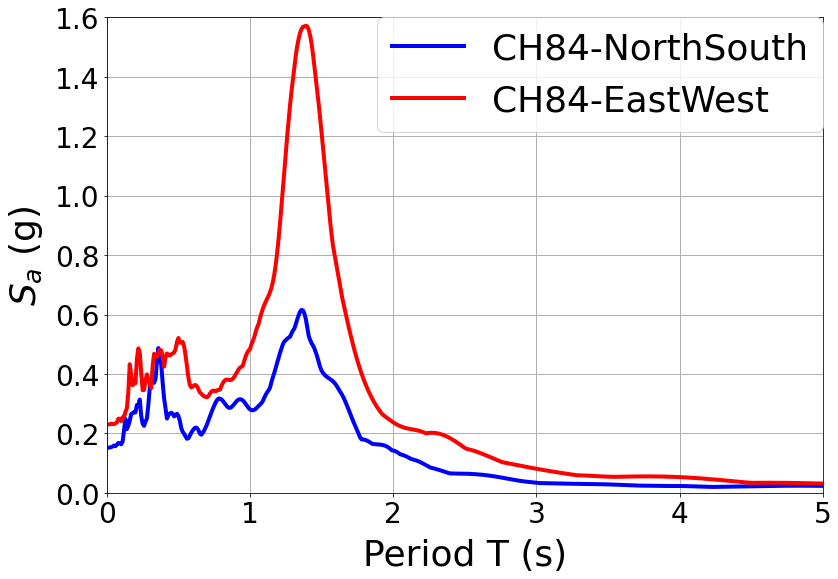

In [65]:
#fig, ax = plt.subplots()
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)

# Plot CH84 North-South component
ax.plot(df_CIRES_ZoneIIIa['Time(s)'], df_CIRES_ZoneIIIa['CH84-EQ14-psaNorthSouth(g)'], linewidth=4, c='blue', label='CH84-NorthSouth')
# Plot CH84 East-West component
ax.plot(df_CIRES_ZoneIIIa['Time(s)'], df_CIRES_ZoneIIIa['CH84-EQ14-psaEastWest(g)'], linewidth=4, c='red', label='CH84-EastWest')

# Add line for period and spectral acceleration
x_x=[1.512,1.512]
y_y=[0.0,0.24]

x_x2=[0,1.512]
y_y2=[0.240,0.240]

#ax.plot(x_x, y_y, lw=4, c='green')
#ax.plot(x_x2, y_y2, lw=4, c='green')

# Set axes limits
ax.set_xlim(0,5)
ax.set_ylim(0,1.6)

# Tick parameters
ax.tick_params(axis="x", labelsize=28)
ax.tick_params(axis="y", labelsize=28)

# Axes titles
ax.set_xlabel('Period T (s)', fontsize = 36, labelpad=10)
ax.set_ylabel('$S_a$ (g)', fontsize = 36, labelpad=10)

# Grid lines
ax.grid(linewidth=1)

# Legend
#box = ax.get_position()
#ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 14})

# Legend
ax.legend(loc=0, borderaxespad=0., prop={'size': 36})


plt.tight_layout()

# Export figure
fig.savefig("/homevol/sroe459/git_projects/2017-Puebla-Mexico-earthquake/Figures/spectrum_CH84_without_design_RS.png", dpi=200)

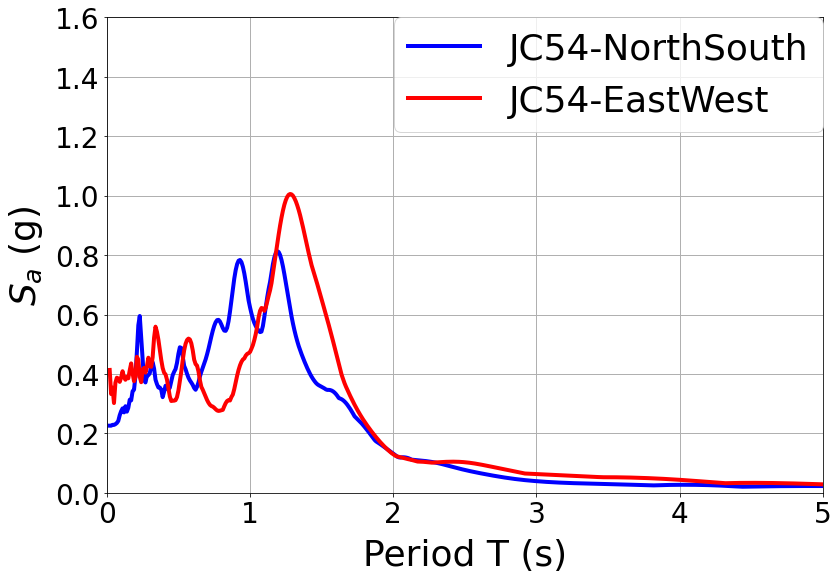

In [57]:
#fig, ax = plt.subplots()
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)

# Plot JC54 North-South component
ax.plot(df_CIRES_ZoneIIIa['Time(s)'], df_CIRES_ZoneIIIa['JC54-EQ35-psaNorthSouth(g)'], linewidth=4, c='blue', label='JC54-NorthSouth')
# Plot JC54 East-West component
ax.plot(df_CIRES_ZoneIIIa['Time(s)'], df_CIRES_ZoneIIIa['JC54-EQ35-psaEastWest(g)'], linewidth=4, c='red', label='JC54-EastWest')

# Add line for period and spectral acceleration
x_x=[1.512,1.512]
y_y=[0.0,0.24]

x_x2=[0,1.512]
y_y2=[0.240,0.240]

#ax.plot(x_x, y_y, lw=4, c='green')
#ax.plot(x_x2, y_y2, lw=4, c='green')

# Set axes limits
ax.set_xlim(0,5)
ax.set_ylim(0,1.6)

# Tick parameters
ax.tick_params(axis="x", labelsize=28)
ax.tick_params(axis="y", labelsize=28)

# Axes titles
ax.set_xlabel('Period T (s)', fontsize = 36, labelpad=10)
ax.set_ylabel('$S_a$ (g)', fontsize = 36, labelpad=10)

# Grid lines
ax.grid(linewidth=1)

# Legend
#box = ax.get_position()
#ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 14})

# Legend
ax.legend(loc=0, borderaxespad=0., prop={'size': 36})


plt.tight_layout()

# Export figure
fig.savefig("/homevol/sroe459/git_projects/2017-Puebla-Mexico-earthquake/Figures/spectrum_JC54_without_design_RS.png", dpi=200)

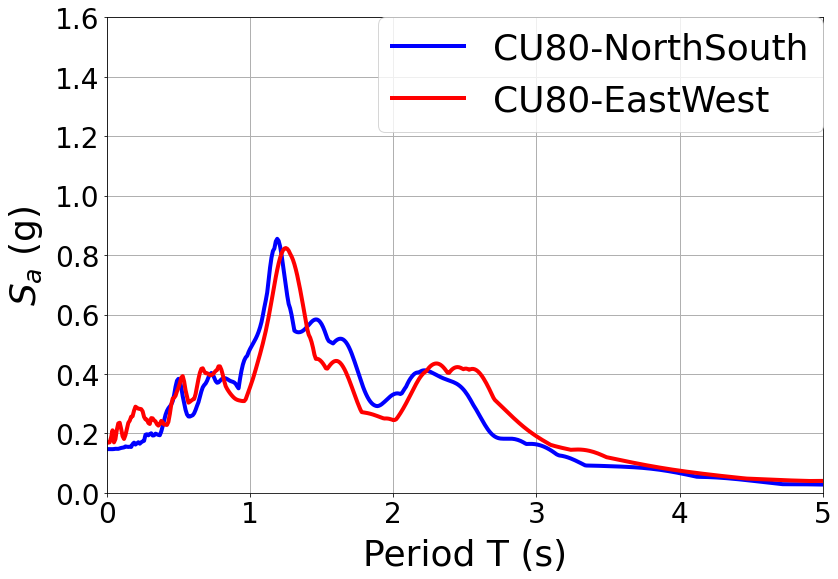

In [59]:
#fig, ax = plt.subplots()
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)

# Plot CU80 North-South component
ax.plot(df_CIRES_ZoneIIIc['Time(s)'], df_CIRES_ZoneIIIc['CU80-EQ22-psaNorthSouth(g)'], linewidth=4, c='blue', label='CU80-NorthSouth')
# Plot CU80 East-West component
ax.plot(df_CIRES_ZoneIIIc['Time(s)'], df_CIRES_ZoneIIIc['CU80-EQ22-psaEastWest(g)'], linewidth=4, c='red', label='CU80-EastWest')

# Add line for period and spectral acceleration
x_x=[1.512,1.512]
y_y=[0.0,0.24]

x_x2=[0,1.512]
y_y2=[0.240,0.240]

#ax.plot(x_x, y_y, lw=4, c='green')
#ax.plot(x_x2, y_y2, lw=4, c='green')

# Set axes limits
ax.set_xlim(0,5)
ax.set_ylim(0,1.6)

# Tick parameters
ax.tick_params(axis="x", labelsize=28)
ax.tick_params(axis="y", labelsize=28)

# Axes titles
ax.set_xlabel('Period T (s)', fontsize = 36, labelpad=10)
ax.set_ylabel('$S_a$ (g)', fontsize = 36, labelpad=10)

# Grid lines
ax.grid(linewidth=1)

# Legend
#box = ax.get_position()
#ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 14})

# Legend
ax.legend(loc=0, borderaxespad=0., prop={'size': 36})


plt.tight_layout()

# Export figure
fig.savefig("/homevol/sroe459/git_projects/2017-Puebla-Mexico-earthquake/Figures/spectrum_CU80_without_design_RS.png", dpi=200)

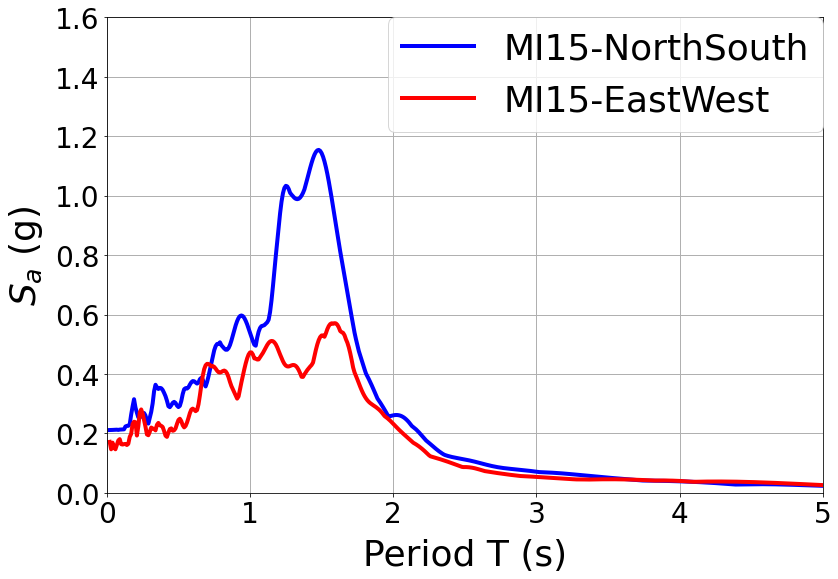

In [60]:
#fig, ax = plt.subplots()
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)

# Plot North-South component
ax.plot(df_CIRES_ZoneIIIa['Time(s)'], df_CIRES_ZoneIIIa['MI15-EQ40-psaNorthSouth(g)'], linewidth=4, c='blue', label='MI15-NorthSouth')

# Plot East-West component
ax.plot(df_CIRES_ZoneIIIa['Time(s)'], df_CIRES_ZoneIIIa['MI15-EQ40-psaEastWest(g)'], linewidth=4, c='red', label='MI15-EastWest')

# Add line for period and spectral acceleration
x_x=[1.512,1.512]
y_y=[0.0,0.24]

x_x2=[0,1.512]
y_y2=[0.240,0.240]

#ax.plot(x_x, y_y, lw=4, c='green')
#ax.plot(x_x2, y_y2, lw=4, c='green')

# Set axes limits
ax.set_xlim(0,5)
ax.set_ylim(0,1.6)

# Tick parameters
ax.tick_params(axis="x", labelsize=28)
ax.tick_params(axis="y", labelsize=28)

# Axes titles
ax.set_xlabel('Period T (s)', fontsize = 36, labelpad=10)
ax.set_ylabel('$S_a$ (g)', fontsize = 36, labelpad=10)

# Grid lines
ax.grid(linewidth=1)

# Legend
#box = ax.get_position()
#ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 14})

# Legend
ax.legend(loc=0, borderaxespad=0., prop={'size': 36})


plt.tight_layout()

# Export figure
fig.savefig("/homevol/sroe459/git_projects/2017-Puebla-Mexico-earthquake/Figures/spectrum_MI15_without_design_RS.png", dpi=200)